In [0]:
!pip install -q keras



In [4]:
!ls


datalab  drive


In [5]:
import pandas as pd
import numpy as np

df = pd.read_table("drive/Colab/omni2_1979.dat", sep="\s+",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1979,1,0,1988,13,13,7,6,5.3,5.2,...,0.32,0.29,0.28,6,7,194.1,0.8,-51,42,6.0
1,1979,1,1,1988,13,13,30,28,5.0,4.5,...,99999.99,99999.99,99999.99,0,7,194.1,0.7,-26,43,6.1
2,1979,1,2,1988,13,13,30,27,4.9,4.7,...,99999.99,99999.99,99999.99,0,7,194.1,0.8,-63,23,6.0
3,1979,1,3,1988,13,13,25,23,4.8,4.7,...,99999.99,99999.99,99999.99,0,15,194.1,0.6,-42,43,5.8
4,1979,1,4,1988,13,13,14,9,4.9,4.8,...,99999.99,99999.99,99999.99,0,15,194.1,2.4,-216,46,5.7


In [0]:
dataset = df[[14,21,23,24,40]]

In [7]:
dataset

,14,21,23,24,40
0,1.0,0.5,1.9,617.0,-29
1,0.4,1.7,1.8,619.0,-27
2,1.0,0.8,1.7,610.0,-29
3,0.7,0.5,1.5,602.0,-30
4,1.5,0.3,1.5,603.0,-31
5,-1.0,2.0,1.7,611.0,-31
6,-1.4,1.7,1.5,605.0,-27
7,1.3,0.6,1.4,597.0,-22
8,1.6,1.0,1.4,596.0,-21
9,0.5,1.3,1.5,605.0,-20


In [8]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(dataset.values)

Using TensorFlow backend.


In [14]:
n_train_hours = 365 * 24
train = dataset.values[:n_train_hours, :]
test = dataset.values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 4) (8760,) (17544, 1, 4) (17544,)


Train on 8760 samples, validate on 17544 samples
Epoch 1/700
8760/8760 [==============================] - 4s 444us/step - loss: 20.1063 - acc: 0.0210 - val_loss: 20.9915 - val_acc: 0.0223
Epoch 2/700
8760/8760 [==============================] - 3s 366us/step - loss: 19.4012 - acc: 0.0237 - val_loss: 20.3493 - val_acc: 0.0231
Epoch 3/700
8760/8760 [==============================] - 3s 367us/step - loss: 18.8405 - acc: 0.0247 - val_loss: 19.8225 - val_acc: 0.0231
Epoch 4/700
8760/8760 [==============================] - 3s 369us/step - loss: 18.3957 - acc: 0.0233 - val_loss: 19.4434 - val_acc: 0.0240
Epoch 5/700
8760/8760 [==============================] - 3s 369us/step - loss: 18.0653 - acc: 0.0219 - val_loss: 19.1465 - val_acc: 0.0223
Epoch 6/700
3936/8760 [============>.................] - ETA: 1s - loss: 18.0899 - acc: 0.0206

8760/8760 [==============================] - 3s 368us/step - loss: 17.8128 - acc: 0.0217 - val_loss: 18.9346 - val_acc: 0.0200
Epoch 7/700
8760/8760 [==============================] - 3s 369us/step - loss: 17.6252 - acc: 0.0208 - val_loss: 18.7565 - val_acc: 0.0213
Epoch 8/700
8760/8760 [==============================] - 3s 373us/step - loss: 17.4830 - acc: 0.0215 - val_loss: 18.6401 - val_acc: 0.0212
Epoch 9/700
8760/8760 [==============================] - 3s 368us/step - loss: 17.3819 - acc: 0.0199 - val_loss: 18.5561 - val_acc: 0.0218
Epoch 10/700
8760/8760 [==============================] - 3s 370us/step - loss: 17.3107 - acc: 0.0227 - val_loss: 18.4874 - val_acc: 0.0211
Epoch 11/700
8352/8760 [===========================>..] - ETA: 0s - loss: 17.2441 - acc: 0.0224

8760/8760 [==============================] - 3s 367us/step - loss: 17.2661 - acc: 0.0226 - val_loss: 18.4587 - val_acc: 0.0196
Epoch 12/700
8760/8760 [==============================] - 3s 369us/step - loss: 17.1850 - acc: 0.0212 - val_loss: 18.3441 - val_acc: 0.0206
Epoch 13/700
8760/8760 [==============================] - 3s 366us/step - loss: 17.0908 - acc: 0.0186 - val_loss: 18.2477 - val_acc: 0.0197
Epoch 14/700
8760/8760 [==============================] - 3s 363us/step - loss: 17.0533 - acc: 0.0208 - val_loss: 18.1617 - val_acc: 0.0216
Epoch 15/700
8760/8760 [==============================] - 3s 367us/step - loss: 17.0249 - acc: 0.0213 - val_loss: 18.1311 - val_acc: 0.0204
Epoch 16/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.9953 - acc: 0.0196 - val_loss: 18.0869 - val_acc: 0.0199
Epoch 17/700
  32/8760 [..............................] - ETA: 2s - loss: 15.7072 - acc: 0.0312

8760/8760 [==============================] - 3s 362us/step - loss: 16.9729 - acc: 0.0221 - val_loss: 18.1332 - val_acc: 0.0211
Epoch 18/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.9700 - acc: 0.0191 - val_loss: 18.0850 - val_acc: 0.0209
Epoch 19/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.9327 - acc: 0.0193 - val_loss: 18.0238 - val_acc: 0.0214
Epoch 20/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.9201 - acc: 0.0219 - val_loss: 17.9932 - val_acc: 0.0216
Epoch 21/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.9112 - acc: 0.0211 - val_loss: 17.9770 - val_acc: 0.0214
Epoch 22/700
7840/8760 [=========================>....] - ETA: 0s - loss: 16.8990 - acc: 0.0196

8760/8760 [==============================] - 3s 370us/step - loss: 16.8873 - acc: 0.0207 - val_loss: 17.9577 - val_acc: 0.0219
Epoch 23/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.8712 - acc: 0.0229 - val_loss: 17.9794 - val_acc: 0.0207
Epoch 24/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.8567 - acc: 0.0218 - val_loss: 17.9357 - val_acc: 0.0215
Epoch 25/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.8457 - acc: 0.0221 - val_loss: 17.9100 - val_acc: 0.0217
Epoch 26/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.8378 - acc: 0.0207 - val_loss: 17.8791 - val_acc: 0.0219
Epoch 27/700
8256/8760 [===========================>..] - ETA: 0s - loss: 16.9204 - acc: 0.0222

8760/8760 [==============================] - 3s 375us/step - loss: 16.8185 - acc: 0.0223 - val_loss: 17.8691 - val_acc: 0.0222
Epoch 28/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.8013 - acc: 0.0224 - val_loss: 17.8499 - val_acc: 0.0219
Epoch 29/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.7804 - acc: 0.0196 - val_loss: 17.8879 - val_acc: 0.0201
Epoch 30/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.7850 - acc: 0.0217 - val_loss: 17.8918 - val_acc: 0.0203
Epoch 31/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.7716 - acc: 0.0224 - val_loss: 17.8666 - val_acc: 0.0204
Epoch 32/700
8448/8760 [===========================>..] - ETA: 0s - loss: 16.7767 - acc: 0.0205

8760/8760 [==============================] - 3s 367us/step - loss: 16.7568 - acc: 0.0204 - val_loss: 17.7836 - val_acc: 0.0226
Epoch 33/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.7669 - acc: 0.0220 - val_loss: 17.7750 - val_acc: 0.0202
Epoch 34/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.7433 - acc: 0.0225 - val_loss: 17.8597 - val_acc: 0.0205
Epoch 35/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.7272 - acc: 0.0231 - val_loss: 17.7779 - val_acc: 0.0202
Epoch 36/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.7294 - acc: 0.0204 - val_loss: 17.7404 - val_acc: 0.0206
Epoch 37/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.7095 - acc: 0.0205 - val_loss: 17.8430 - val_acc: 0.0205


Epoch 38/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.7167 - acc: 0.0213 - val_loss: 17.7307 - val_acc: 0.0211
Epoch 39/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.7020 - acc: 0.0210 - val_loss: 17.7274 - val_acc: 0.0200
Epoch 40/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.8167 - acc: 0.0215 - val_loss: 17.7024 - val_acc: 0.0210
Epoch 41/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.6975 - acc: 0.0180 - val_loss: 17.8208 - val_acc: 0.0178
Epoch 42/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.6912 - acc: 0.0207 - val_loss: 17.6676 - val_acc: 0.0209
Epoch 43/700
7040/8760 [=======================>......] - ETA: 0s - loss: 16.4471 - acc: 0.0232

8760/8760 [==============================] - 3s 366us/step - loss: 16.6551 - acc: 0.0218 - val_loss: 17.6656 - val_acc: 0.0201
Epoch 44/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.6690 - acc: 0.0199 - val_loss: 17.7424 - val_acc: 0.0199
Epoch 45/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.6697 - acc: 0.0203 - val_loss: 17.6509 - val_acc: 0.0202
Epoch 46/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.6529 - acc: 0.0208 - val_loss: 17.6442 - val_acc: 0.0205
Epoch 47/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.6568 - acc: 0.0209 - val_loss: 17.6237 - val_acc: 0.0207
Epoch 48/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.6214 - acc: 0.0207 - val_loss: 17.6898 - val_acc: 0.0192


Epoch 49/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.6273 - acc: 0.0192 - val_loss: 17.7243 - val_acc: 0.0209
Epoch 50/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.6503 - acc: 0.0194 - val_loss: 17.6282 - val_acc: 0.0203
Epoch 51/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.6123 - acc: 0.0200 - val_loss: 17.5985 - val_acc: 0.0210
Epoch 52/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.6100 - acc: 0.0205 - val_loss: 17.5802 - val_acc: 0.0215
Epoch 53/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.6204 - acc: 0.0200 - val_loss: 17.5760 - val_acc: 0.0208
Epoch 54/700
7008/8760 [=======================>......] - ETA: 0s - loss: 16.8486 - acc: 0.0174

8760/8760 [==============================] - 3s 368us/step - loss: 16.7899 - acc: 0.0183 - val_loss: 17.5616 - val_acc: 0.0215
Epoch 55/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.6043 - acc: 0.0217 - val_loss: 17.6256 - val_acc: 0.0193
Epoch 56/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.5929 - acc: 0.0205 - val_loss: 17.5344 - val_acc: 0.0201
Epoch 57/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.5736 - acc: 0.0200 - val_loss: 17.5792 - val_acc: 0.0206
Epoch 58/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.5824 - acc: 0.0192 - val_loss: 17.5683 - val_acc: 0.0205
Epoch 59/700
8736/8760 [============================>.] - ETA: 0s - loss: 16.5719 - acc: 0.0185

8760/8760 [==============================] - 3s 371us/step - loss: 16.5740 - acc: 0.0185 - val_loss: 17.6115 - val_acc: 0.0189
Epoch 60/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.5585 - acc: 0.0200 - val_loss: 17.5229 - val_acc: 0.0214
Epoch 61/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.5693 - acc: 0.0177 - val_loss: 17.6604 - val_acc: 0.0190
Epoch 62/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.5758 - acc: 0.0213 - val_loss: 17.5075 - val_acc: 0.0210
Epoch 63/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.5903 - acc: 0.0203 - val_loss: 17.4979 - val_acc: 0.0225
Epoch 64/700
8760/8760 [==============================] - 3s 373us/step - loss: 16.5777 - acc: 0.0192 - val_loss: 17.5701 - val_acc: 0.0195


Epoch 65/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.5760 - acc: 0.0188 - val_loss: 17.4771 - val_acc: 0.0209
Epoch 66/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.5766 - acc: 0.0192 - val_loss: 17.5258 - val_acc: 0.0204
Epoch 67/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.5561 - acc: 0.0203 - val_loss: 17.5422 - val_acc: 0.0195
Epoch 68/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.5595 - acc: 0.0186 - val_loss: 17.4658 - val_acc: 0.0221
Epoch 69/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.7846 - acc: 0.0217 - val_loss: 18.4619 - val_acc: 0.0210
Epoch 70/700
7712/8760 [=========================>....] - ETA: 0s - loss: 17.0817 - acc: 0.0197

8760/8760 [==============================] - 3s 365us/step - loss: 17.2135 - acc: 0.0197 - val_loss: 18.3536 - val_acc: 0.0209
Epoch 71/700
8760/8760 [==============================] - 3s 366us/step - loss: 17.1299 - acc: 0.0221 - val_loss: 18.2819 - val_acc: 0.0213
Epoch 72/700
8760/8760 [==============================] - 3s 368us/step - loss: 17.0878 - acc: 0.0220 - val_loss: 18.2387 - val_acc: 0.0216
Epoch 73/700
8760/8760 [==============================] - 3s 373us/step - loss: 17.0516 - acc: 0.0205 - val_loss: 18.2147 - val_acc: 0.0215
Epoch 74/700
8760/8760 [==============================] - 3s 370us/step - loss: 17.0414 - acc: 0.0210 - val_loss: 18.2037 - val_acc: 0.0205
Epoch 75/700
8288/8760 [===========================>..] - ETA: 0s - loss: 17.0769 - acc: 0.0200

8760/8760 [==============================] - 3s 375us/step - loss: 17.0328 - acc: 0.0197 - val_loss: 18.1897 - val_acc: 0.0210
Epoch 76/700
8760/8760 [==============================] - 3s 373us/step - loss: 17.0251 - acc: 0.0189 - val_loss: 18.1789 - val_acc: 0.0211
Epoch 77/700
8760/8760 [==============================] - 3s 372us/step - loss: 17.0196 - acc: 0.0200 - val_loss: 18.1709 - val_acc: 0.0191
Epoch 78/700
8760/8760 [==============================] - 3s 373us/step - loss: 17.0176 - acc: 0.0193 - val_loss: 18.1746 - val_acc: 0.0180
Epoch 79/700
8760/8760 [==============================] - 3s 370us/step - loss: 17.0126 - acc: 0.0191 - val_loss: 18.1971 - val_acc: 0.0185
Epoch 80/700
8608/8760 [============================>.] - ETA: 0s - loss: 16.9910 - acc: 0.0191

8760/8760 [==============================] - 3s 368us/step - loss: 17.0056 - acc: 0.0187 - val_loss: 18.1594 - val_acc: 0.0192
Epoch 81/700
8760/8760 [==============================] - 3s 379us/step - loss: 16.9979 - acc: 0.0197 - val_loss: 18.1574 - val_acc: 0.0182
Epoch 82/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.9973 - acc: 0.0195 - val_loss: 18.1692 - val_acc: 0.0180
Epoch 83/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.9915 - acc: 0.0189 - val_loss: 18.1504 - val_acc: 0.0181
Epoch 84/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.9898 - acc: 0.0192 - val_loss: 18.1433 - val_acc: 0.0184
Epoch 85/700
8672/8760 [============================>.] - ETA: 0s - loss: 17.0150 - acc: 0.0185

8760/8760 [==============================] - 3s 368us/step - loss: 16.9843 - acc: 0.0187 - val_loss: 18.1379 - val_acc: 0.0195
Epoch 86/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.9835 - acc: 0.0186 - val_loss: 18.1325 - val_acc: 0.0185
Epoch 87/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.9786 - acc: 0.0188 - val_loss: 18.1638 - val_acc: 0.0189
Epoch 88/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.9723 - acc: 0.0200 - val_loss: 18.1237 - val_acc: 0.0181
Epoch 89/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.9695 - acc: 0.0194 - val_loss: 18.1212 - val_acc: 0.0192
Epoch 90/700
8192/8760 [===========================>..] - ETA: 0s - loss: 16.9554 - acc: 0.0199

8760/8760 [==============================] - 3s 374us/step - loss: 16.9659 - acc: 0.0196 - val_loss: 18.1202 - val_acc: 0.0178
Epoch 91/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.9700 - acc: 0.0187 - val_loss: 18.1123 - val_acc: 0.0181
Epoch 92/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.9604 - acc: 0.0187 - val_loss: 18.1477 - val_acc: 0.0200
Epoch 93/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.9636 - acc: 0.0188 - val_loss: 18.1181 - val_acc: 0.0186
Epoch 94/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.9561 - acc: 0.0187 - val_loss: 18.0984 - val_acc: 0.0182
Epoch 95/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.9513 - acc: 0.0196 - val_loss: 18.0941 - val_acc: 0.0185


Epoch 96/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.9463 - acc: 0.0196 - val_loss: 18.1058 - val_acc: 0.0186
Epoch 97/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.9456 - acc: 0.0193 - val_loss: 18.0903 - val_acc: 0.0193
Epoch 98/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.9440 - acc: 0.0192 - val_loss: 18.0823 - val_acc: 0.0188
Epoch 99/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.9616 - acc: 0.0189 - val_loss: 18.1209 - val_acc: 0.0199
Epoch 100/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.9398 - acc: 0.0187 - val_loss: 18.0828 - val_acc: 0.0193
Epoch 101/700
7328/8760 [========================>.....] - ETA: 0s - loss: 16.8971 - acc: 0.0188

8760/8760 [==============================] - 3s 368us/step - loss: 16.9393 - acc: 0.0187 - val_loss: 18.0702 - val_acc: 0.0191
Epoch 102/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.9258 - acc: 0.0205 - val_loss: 18.0693 - val_acc: 0.0180
Epoch 103/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.9264 - acc: 0.0195 - val_loss: 18.0607 - val_acc: 0.0193
Epoch 104/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.9159 - acc: 0.0189 - val_loss: 18.0577 - val_acc: 0.0190
Epoch 105/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.9154 - acc: 0.0187 - val_loss: 18.0642 - val_acc: 0.0186
Epoch 106/700
8608/8760 [============================>.] - ETA: 0s - loss: 16.9111 - acc: 0.0194

8760/8760 [==============================] - 3s 364us/step - loss: 16.9102 - acc: 0.0195 - val_loss: 18.0475 - val_acc: 0.0186
Epoch 107/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.9051 - acc: 0.0184 - val_loss: 18.0437 - val_acc: 0.0182
Epoch 108/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.9137 - acc: 0.0188 - val_loss: 18.0402 - val_acc: 0.0181
Epoch 109/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.9083 - acc: 0.0189 - val_loss: 18.0687 - val_acc: 0.0208
Epoch 110/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.9113 - acc: 0.0201 - val_loss: 18.0495 - val_acc: 0.0222
Epoch 111/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.8983 - acc: 0.0209 - val_loss: 18.0383 - val_acc: 0.0204
Epoch 112/700
  32/8760 [..............................] - ETA: 3s - loss: 22.8335 - acc: 0.0000e+00

8760/8760 [==============================] - 3s 368us/step - loss: 16.8996 - acc: 0.0209 - val_loss: 18.0408 - val_acc: 0.0225
Epoch 113/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.8928 - acc: 0.0209 - val_loss: 18.0204 - val_acc: 0.0202
Epoch 114/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.8910 - acc: 0.0209 - val_loss: 18.0148 - val_acc: 0.0211
Epoch 115/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.8803 - acc: 0.0213 - val_loss: 18.0305 - val_acc: 0.0204
Epoch 116/700
8760/8760 [==============================] - 3s 373us/step - loss: 16.8834 - acc: 0.0205 - val_loss: 18.0274 - val_acc: 0.0205
Epoch 117/700
7488/8760 [========================>.....] - ETA: 0s - loss: 16.9448 - acc: 0.0207

8760/8760 [==============================] - 3s 367us/step - loss: 16.8799 - acc: 0.0208 - val_loss: 18.0016 - val_acc: 0.0215
Epoch 118/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.8735 - acc: 0.0207 - val_loss: 17.9999 - val_acc: 0.0221
Epoch 119/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.8749 - acc: 0.0194 - val_loss: 17.9938 - val_acc: 0.0219
Epoch 120/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.8664 - acc: 0.0208 - val_loss: 18.0056 - val_acc: 0.0205
Epoch 121/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.8625 - acc: 0.0212 - val_loss: 17.9944 - val_acc: 0.0222
Epoch 122/700
8096/8760 [==========================>...] - ETA: 0s - loss: 16.8795 - acc: 0.0206

8760/8760 [==============================] - 3s 368us/step - loss: 16.8648 - acc: 0.0209 - val_loss: 17.9863 - val_acc: 0.0207
Epoch 123/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.8566 - acc: 0.0197 - val_loss: 17.9994 - val_acc: 0.0220
Epoch 124/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.8546 - acc: 0.0209 - val_loss: 17.9785 - val_acc: 0.0214
Epoch 125/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.8541 - acc: 0.0204 - val_loss: 17.9742 - val_acc: 0.0205
Epoch 126/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.8488 - acc: 0.0215 - val_loss: 17.9723 - val_acc: 0.0215
Epoch 127/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.8499 - acc: 0.0217 - val_loss: 17.9846 - val_acc: 0.0207


Epoch 128/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.8461 - acc: 0.0204 - val_loss: 17.9598 - val_acc: 0.0204
Epoch 129/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.8430 - acc: 0.0203 - val_loss: 17.9548 - val_acc: 0.0219
Epoch 130/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.8363 - acc: 0.0211 - val_loss: 17.9806 - val_acc: 0.0215
Epoch 131/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.8351 - acc: 0.0209 - val_loss: 17.9477 - val_acc: 0.0207
Epoch 132/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.8456 - acc: 0.0220 - val_loss: 17.9631 - val_acc: 0.0209
Epoch 133/700
7040/8760 [=======================>......] - ETA: 0s - loss: 17.0391 - acc: 0.0196

8760/8760 [==============================] - 3s 366us/step - loss: 16.8304 - acc: 0.0216 - val_loss: 17.9400 - val_acc: 0.0215
Epoch 134/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.8246 - acc: 0.0215 - val_loss: 17.9681 - val_acc: 0.0215
Epoch 135/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.8249 - acc: 0.0207 - val_loss: 17.9344 - val_acc: 0.0203
Epoch 136/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.8326 - acc: 0.0207 - val_loss: 17.9337 - val_acc: 0.0208
Epoch 137/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.8167 - acc: 0.0212 - val_loss: 17.9419 - val_acc: 0.0221
Epoch 138/700
8576/8760 [============================>.] - ETA: 0s - loss: 16.8315 - acc: 0.0222

8760/8760 [==============================] - 3s 363us/step - loss: 16.8161 - acc: 0.0220 - val_loss: 18.0334 - val_acc: 0.0203
Epoch 139/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.8333 - acc: 0.0208 - val_loss: 17.9259 - val_acc: 0.0215
Epoch 140/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.8067 - acc: 0.0212 - val_loss: 17.9153 - val_acc: 0.0216
Epoch 141/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.8051 - acc: 0.0217 - val_loss: 17.9266 - val_acc: 0.0213
Epoch 142/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.8067 - acc: 0.0210 - val_loss: 17.9099 - val_acc: 0.0206
Epoch 143/700
8224/8760 [===========================>..] - ETA: 0s - loss: 16.7727 - acc: 0.0219

8760/8760 [==============================] - 3s 369us/step - loss: 16.8017 - acc: 0.0220 - val_loss: 17.9312 - val_acc: 0.0214
Epoch 144/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.7963 - acc: 0.0209 - val_loss: 17.9466 - val_acc: 0.0208
Epoch 145/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.8052 - acc: 0.0221 - val_loss: 17.8988 - val_acc: 0.0219
Epoch 146/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.7920 - acc: 0.0225 - val_loss: 17.9263 - val_acc: 0.0212
Epoch 147/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.7958 - acc: 0.0204 - val_loss: 17.8906 - val_acc: 0.0206
Epoch 148/700
8160/8760 [==========================>...] - ETA: 0s - loss: 16.7428 - acc: 0.0210

8760/8760 [==============================] - 3s 369us/step - loss: 16.7886 - acc: 0.0210 - val_loss: 17.8857 - val_acc: 0.0207
Epoch 149/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.7905 - acc: 0.0208 - val_loss: 17.8836 - val_acc: 0.0219
Epoch 150/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.7835 - acc: 0.0217 - val_loss: 17.8689 - val_acc: 0.0213
Epoch 151/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.7804 - acc: 0.0219 - val_loss: 17.8659 - val_acc: 0.0213
Epoch 152/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.7772 - acc: 0.0202 - val_loss: 17.8645 - val_acc: 0.0222
Epoch 153/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.7796 - acc: 0.0212 - val_loss: 17.8572 - val_acc: 0.0214


Epoch 154/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.7804 - acc: 0.0204 - val_loss: 17.8897 - val_acc: 0.0210
Epoch 155/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.7703 - acc: 0.0212 - val_loss: 17.9077 - val_acc: 0.0209
Epoch 156/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.7639 - acc: 0.0219 - val_loss: 17.8688 - val_acc: 0.0220
Epoch 157/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.7712 - acc: 0.0209 - val_loss: 17.8437 - val_acc: 0.0214
Epoch 158/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.7619 - acc: 0.0210 - val_loss: 17.8714 - val_acc: 0.0212
Epoch 159/700
6432/8760 [=====================>........] - ETA: 0s - loss: 16.6374 - acc: 0.0204

8760/8760 [==============================] - 3s 368us/step - loss: 16.7644 - acc: 0.0220 - val_loss: 17.8375 - val_acc: 0.0219
Epoch 160/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.7540 - acc: 0.0225 - val_loss: 17.8323 - val_acc: 0.0214
Epoch 161/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.7620 - acc: 0.0229 - val_loss: 17.8277 - val_acc: 0.0214
Epoch 162/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.7523 - acc: 0.0225 - val_loss: 17.8527 - val_acc: 0.0220
Epoch 163/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.7562 - acc: 0.0217 - val_loss: 17.8245 - val_acc: 0.0226
Epoch 164/700
8256/8760 [===========================>..] - ETA: 0s - loss: 16.8248 - acc: 0.0229

8760/8760 [==============================] - 3s 369us/step - loss: 16.7541 - acc: 0.0223 - val_loss: 17.8189 - val_acc: 0.0215
Epoch 165/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.7393 - acc: 0.0208 - val_loss: 17.8155 - val_acc: 0.0218
Epoch 166/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.7394 - acc: 0.0220 - val_loss: 17.8239 - val_acc: 0.0221
Epoch 167/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.7406 - acc: 0.0220 - val_loss: 17.8072 - val_acc: 0.0215
Epoch 168/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.7346 - acc: 0.0213 - val_loss: 17.8043 - val_acc: 0.0218
Epoch 169/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.7304 - acc: 0.0231 - val_loss: 17.8011 - val_acc: 0.0210


Epoch 170/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.7343 - acc: 0.0209 - val_loss: 17.7977 - val_acc: 0.0212
Epoch 171/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.7241 - acc: 0.0205 - val_loss: 17.7946 - val_acc: 0.0213
Epoch 172/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.7321 - acc: 0.0210 - val_loss: 17.8037 - val_acc: 0.0208
Epoch 173/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.7366 - acc: 0.0223 - val_loss: 17.7858 - val_acc: 0.0207
Epoch 174/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.7234 - acc: 0.0216 - val_loss: 17.8056 - val_acc: 0.0216
Epoch 175/700
7008/8760 [=======================>......] - ETA: 0s - loss: 16.7288 - acc: 0.0217

8760/8760 [==============================] - 3s 359us/step - loss: 16.7187 - acc: 0.0210 - val_loss: 17.8055 - val_acc: 0.0213
Epoch 176/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.7193 - acc: 0.0221 - val_loss: 17.7836 - val_acc: 0.0212
Epoch 177/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.7063 - acc: 0.0213 - val_loss: 17.7863 - val_acc: 0.0209
Epoch 178/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.7079 - acc: 0.0208 - val_loss: 17.7685 - val_acc: 0.0212
Epoch 179/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.7023 - acc: 0.0221 - val_loss: 17.7646 - val_acc: 0.0207
Epoch 180/700
8736/8760 [============================>.] - ETA: 0s - loss: 16.7047 - acc: 0.0221

8760/8760 [==============================] - 3s 363us/step - loss: 16.7093 - acc: 0.0221 - val_loss: 17.7744 - val_acc: 0.0210
Epoch 181/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.6981 - acc: 0.0203 - val_loss: 17.7716 - val_acc: 0.0206
Epoch 182/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.7019 - acc: 0.0212 - val_loss: 17.7575 - val_acc: 0.0209
Epoch 183/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.6936 - acc: 0.0220 - val_loss: 17.7815 - val_acc: 0.0214
Epoch 184/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.6993 - acc: 0.0210 - val_loss: 17.7541 - val_acc: 0.0210
Epoch 185/700
8512/8760 [============================>.] - ETA: 0s - loss: 16.6628 - acc: 0.0209

8760/8760 [==============================] - 3s 366us/step - loss: 16.6894 - acc: 0.0211 - val_loss: 17.7837 - val_acc: 0.0203
Epoch 186/700
8760/8760 [==============================] - 3s 373us/step - loss: 16.6839 - acc: 0.0204 - val_loss: 17.7821 - val_acc: 0.0203
Epoch 187/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.6909 - acc: 0.0215 - val_loss: 17.7371 - val_acc: 0.0209
Epoch 188/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.6797 - acc: 0.0204 - val_loss: 17.7356 - val_acc: 0.0214
Epoch 189/700
8760/8760 [==============================] - 3s 374us/step - loss: 16.6753 - acc: 0.0219 - val_loss: 17.7321 - val_acc: 0.0214
Epoch 190/700
7776/8760 [=========================>....] - ETA: 0s - loss: 16.6992 - acc: 0.0202

8760/8760 [==============================] - 3s 370us/step - loss: 16.6777 - acc: 0.0201 - val_loss: 17.7459 - val_acc: 0.0206
Epoch 191/700
8760/8760 [==============================] - 3s 373us/step - loss: 16.6772 - acc: 0.0203 - val_loss: 17.7258 - val_acc: 0.0211
Epoch 192/700
8760/8760 [==============================] - 3s 374us/step - loss: 16.6787 - acc: 0.0189 - val_loss: 17.7192 - val_acc: 0.0207
Epoch 193/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.6794 - acc: 0.0219 - val_loss: 17.7221 - val_acc: 0.0210
Epoch 194/700
8760/8760 [==============================] - 3s 373us/step - loss: 16.6700 - acc: 0.0210 - val_loss: 17.7743 - val_acc: 0.0207
Epoch 195/700
7744/8760 [=========================>....] - ETA: 0s - loss: 16.6819 - acc: 0.0210

8760/8760 [==============================] - 3s 377us/step - loss: 16.6728 - acc: 0.0203 - val_loss: 17.7215 - val_acc: 0.0210
Epoch 196/700
8760/8760 [==============================] - 3s 380us/step - loss: 16.6705 - acc: 0.0202 - val_loss: 17.8669 - val_acc: 0.0210
Epoch 197/700
8760/8760 [==============================] - 3s 375us/step - loss: 16.6697 - acc: 0.0215 - val_loss: 17.7048 - val_acc: 0.0209
Epoch 198/700
8760/8760 [==============================] - 3s 376us/step - loss: 16.6579 - acc: 0.0224 - val_loss: 17.8474 - val_acc: 0.0208
Epoch 199/700
8760/8760 [==============================] - 3s 377us/step - loss: 16.6564 - acc: 0.0195 - val_loss: 17.7231 - val_acc: 0.0215
Epoch 200/700
8224/8760 [===========================>..] - ETA: 0s - loss: 16.6305 - acc: 0.0213

8760/8760 [==============================] - 3s 364us/step - loss: 16.6524 - acc: 0.0212 - val_loss: 17.6970 - val_acc: 0.0214
Epoch 201/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.6551 - acc: 0.0204 - val_loss: 17.7676 - val_acc: 0.0206
Epoch 202/700
8760/8760 [==============================] - 3s 375us/step - loss: 16.6499 - acc: 0.0186 - val_loss: 17.6996 - val_acc: 0.0206
Epoch 203/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.6512 - acc: 0.0192 - val_loss: 17.7354 - val_acc: 0.0190
Epoch 204/700
8760/8760 [==============================] - 3s 377us/step - loss: 16.6488 - acc: 0.0204 - val_loss: 17.6849 - val_acc: 0.0206
Epoch 205/700
8160/8760 [==========================>...] - ETA: 0s - loss: 16.6264 - acc: 0.0195

8760/8760 [==============================] - 3s 371us/step - loss: 16.6512 - acc: 0.0192 - val_loss: 17.7521 - val_acc: 0.0202
Epoch 206/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.6513 - acc: 0.0195 - val_loss: 17.7029 - val_acc: 0.0203
Epoch 207/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.6459 - acc: 0.0199 - val_loss: 17.7746 - val_acc: 0.0189
Epoch 208/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.6332 - acc: 0.0195 - val_loss: 17.6696 - val_acc: 0.0203
Epoch 209/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.6271 - acc: 0.0197 - val_loss: 17.6687 - val_acc: 0.0206
Epoch 210/700
8384/8760 [===========================>..] - ETA: 0s - loss: 16.6490 - acc: 0.0187

8760/8760 [==============================] - 3s 367us/step - loss: 16.6452 - acc: 0.0183 - val_loss: 17.6635 - val_acc: 0.0201
Epoch 211/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.6308 - acc: 0.0196 - val_loss: 17.6827 - val_acc: 0.0206
Epoch 212/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.6278 - acc: 0.0191 - val_loss: 17.6635 - val_acc: 0.0202
Epoch 213/700
8760/8760 [==============================] - 3s 373us/step - loss: 16.6236 - acc: 0.0211 - val_loss: 17.6672 - val_acc: 0.0209
Epoch 214/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.6174 - acc: 0.0188 - val_loss: 17.6481 - val_acc: 0.0199
Epoch 215/700
8096/8760 [==========================>...] - ETA: 0s - loss: 16.6239 - acc: 0.0209

8760/8760 [==============================] - 3s 371us/step - loss: 16.6126 - acc: 0.0202 - val_loss: 17.8742 - val_acc: 0.0207
Epoch 216/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.6278 - acc: 0.0204 - val_loss: 17.6741 - val_acc: 0.0193
Epoch 217/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.6161 - acc: 0.0196 - val_loss: 17.6436 - val_acc: 0.0203
Epoch 218/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.6105 - acc: 0.0180 - val_loss: 17.6616 - val_acc: 0.0205
Epoch 219/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.6099 - acc: 0.0211 - val_loss: 17.6349 - val_acc: 0.0205
Epoch 220/700
8256/8760 [===========================>..] - ETA: 0s - loss: 16.5968 - acc: 0.0212

8760/8760 [==============================] - 3s 369us/step - loss: 16.6086 - acc: 0.0208 - val_loss: 17.6379 - val_acc: 0.0202
Epoch 221/700
8760/8760 [==============================] - 3s 373us/step - loss: 16.6129 - acc: 0.0202 - val_loss: 17.6355 - val_acc: 0.0201
Epoch 222/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.6215 - acc: 0.0188 - val_loss: 17.6307 - val_acc: 0.0209
Epoch 223/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.6335 - acc: 0.0195 - val_loss: 17.6511 - val_acc: 0.0202
Epoch 224/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.6279 - acc: 0.0204 - val_loss: 17.6936 - val_acc: 0.0202
Epoch 225/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.6472 - acc: 0.0192 - val_loss: 17.6544 - val_acc: 0.0196


Epoch 226/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.6318 - acc: 0.0194 - val_loss: 17.6534 - val_acc: 0.0201
Epoch 227/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.6279 - acc: 0.0179 - val_loss: 17.6624 - val_acc: 0.0189
Epoch 228/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.6201 - acc: 0.0195 - val_loss: 17.6563 - val_acc: 0.0197
Epoch 229/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.6176 - acc: 0.0199 - val_loss: 17.6303 - val_acc: 0.0196
Epoch 230/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.6143 - acc: 0.0177 - val_loss: 17.6094 - val_acc: 0.0199
Epoch 231/700
7008/8760 [=======================>......] - ETA: 0s - loss: 16.5814 - acc: 0.0201

8760/8760 [==============================] - 3s 364us/step - loss: 16.6145 - acc: 0.0208 - val_loss: 17.6395 - val_acc: 0.0203
Epoch 232/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.6072 - acc: 0.0212 - val_loss: 17.6043 - val_acc: 0.0204
Epoch 233/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.6030 - acc: 0.0184 - val_loss: 17.6176 - val_acc: 0.0194
Epoch 234/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.5951 - acc: 0.0195 - val_loss: 17.5989 - val_acc: 0.0207
Epoch 235/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.5904 - acc: 0.0216 - val_loss: 17.6083 - val_acc: 0.0199
Epoch 236/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.5824 - acc: 0.0199 - val_loss: 17.6674 - val_acc: 0.0193
Epoch 237/700
 288/8760 [..............................] - ETA: 2s - loss: 16.9702 - acc: 0.0069    

8760/8760 [==============================] - 3s 361us/step - loss: 16.5821 - acc: 0.0203 - val_loss: 17.6611 - val_acc: 0.0196
Epoch 238/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.5850 - acc: 0.0197 - val_loss: 17.6465 - val_acc: 0.0201
Epoch 239/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.5815 - acc: 0.0197 - val_loss: 17.5913 - val_acc: 0.0202
Epoch 240/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.5714 - acc: 0.0209 - val_loss: 17.6003 - val_acc: 0.0202
Epoch 241/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.5676 - acc: 0.0200 - val_loss: 17.6857 - val_acc: 0.0209
Epoch 242/700
8480/8760 [============================>.] - ETA: 0s - loss: 16.5272 - acc: 0.0182

8760/8760 [==============================] - 3s 361us/step - loss: 16.5652 - acc: 0.0183 - val_loss: 17.5796 - val_acc: 0.0206
Epoch 243/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.5582 - acc: 0.0204 - val_loss: 17.5733 - val_acc: 0.0209
Epoch 244/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.5628 - acc: 0.0218 - val_loss: 17.5743 - val_acc: 0.0206
Epoch 245/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.5639 - acc: 0.0193 - val_loss: 17.5664 - val_acc: 0.0209
Epoch 246/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.5563 - acc: 0.0183 - val_loss: 17.6829 - val_acc: 0.0213
Epoch 247/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.5567 - acc: 0.0203 - val_loss: 17.5572 - val_acc: 0.0213


Epoch 248/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.5501 - acc: 0.0184 - val_loss: 17.5935 - val_acc: 0.0210
Epoch 249/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.5520 - acc: 0.0185 - val_loss: 17.5566 - val_acc: 0.0203
Epoch 250/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.5421 - acc: 0.0215 - val_loss: 17.8307 - val_acc: 0.0206
Epoch 251/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.5362 - acc: 0.0199 - val_loss: 17.5622 - val_acc: 0.0199
Epoch 252/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.5498 - acc: 0.0203 - val_loss: 17.6062 - val_acc: 0.0205
Epoch 253/700
6880/8760 [======================>.......] - ETA: 0s - loss: 16.5109 - acc: 0.0206

8760/8760 [==============================] - 3s 360us/step - loss: 16.5449 - acc: 0.0203 - val_loss: 17.5431 - val_acc: 0.0205
Epoch 254/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.5203 - acc: 0.0220 - val_loss: 17.5641 - val_acc: 0.0201
Epoch 255/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.5227 - acc: 0.0201 - val_loss: 17.5634 - val_acc: 0.0207
Epoch 256/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.5215 - acc: 0.0197 - val_loss: 17.5258 - val_acc: 0.0212
Epoch 257/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.5313 - acc: 0.0209 - val_loss: 17.5345 - val_acc: 0.0205
Epoch 258/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.5131 - acc: 0.0213 - val_loss: 17.5191 - val_acc: 0.0215


Epoch 259/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.5151 - acc: 0.0178 - val_loss: 17.5288 - val_acc: 0.0213
Epoch 260/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.5001 - acc: 0.0207 - val_loss: 17.5284 - val_acc: 0.0203
Epoch 261/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.5014 - acc: 0.0215 - val_loss: 17.5093 - val_acc: 0.0217
Epoch 262/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.4993 - acc: 0.0202 - val_loss: 17.5132 - val_acc: 0.0216
Epoch 263/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.5047 - acc: 0.0213 - val_loss: 17.5383 - val_acc: 0.0200
Epoch 264/700
6848/8760 [======================>.......] - ETA: 0s - loss: 16.6018 - acc: 0.0209

8760/8760 [==============================] - 3s 364us/step - loss: 16.4943 - acc: 0.0203 - val_loss: 17.5000 - val_acc: 0.0219
Epoch 265/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.4861 - acc: 0.0208 - val_loss: 17.5321 - val_acc: 0.0205
Epoch 266/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.4970 - acc: 0.0209 - val_loss: 17.4935 - val_acc: 0.0212
Epoch 267/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.4760 - acc: 0.0209 - val_loss: 17.5118 - val_acc: 0.0212
Epoch 268/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.4793 - acc: 0.0203 - val_loss: 17.5048 - val_acc: 0.0214
Epoch 269/700
8672/8760 [============================>.] - ETA: 0s - loss: 16.4923 - acc: 0.0210

8760/8760 [==============================] - 3s 370us/step - loss: 16.4856 - acc: 0.0211 - val_loss: 17.5090 - val_acc: 0.0202
Epoch 270/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.4769 - acc: 0.0189 - val_loss: 17.4769 - val_acc: 0.0215
Epoch 271/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.4922 - acc: 0.0227 - val_loss: 17.4733 - val_acc: 0.0220
Epoch 272/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.4734 - acc: 0.0194 - val_loss: 17.4677 - val_acc: 0.0219
Epoch 273/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.4673 - acc: 0.0209 - val_loss: 17.4677 - val_acc: 0.0213
Epoch 274/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.4696 - acc: 0.0188 - val_loss: 17.4825 - val_acc: 0.0205
Epoch 275/700
  32/8760 [..............................] - ETA: 3s - loss: 18.1664 - acc: 0.0000e+00

8760/8760 [==============================] - 3s 366us/step - loss: 16.4612 - acc: 0.0225 - val_loss: 17.5471 - val_acc: 0.0203
Epoch 276/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.4594 - acc: 0.0236 - val_loss: 17.4539 - val_acc: 0.0215
Epoch 277/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.4671 - acc: 0.0197 - val_loss: 17.4479 - val_acc: 0.0215
Epoch 278/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.4549 - acc: 0.0216 - val_loss: 17.4615 - val_acc: 0.0210
Epoch 279/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.4547 - acc: 0.0221 - val_loss: 17.5066 - val_acc: 0.0205
Epoch 280/700
7584/8760 [========================>.....] - ETA: 0s - loss: 16.5730 - acc: 0.0212

8760/8760 [==============================] - 3s 364us/step - loss: 16.4503 - acc: 0.0218 - val_loss: 17.4441 - val_acc: 0.0209
Epoch 281/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.4489 - acc: 0.0212 - val_loss: 17.5428 - val_acc: 0.0206
Epoch 282/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.4555 - acc: 0.0226 - val_loss: 17.4329 - val_acc: 0.0212
Epoch 283/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.4413 - acc: 0.0208 - val_loss: 17.4768 - val_acc: 0.0207
Epoch 284/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.4435 - acc: 0.0212 - val_loss: 17.4571 - val_acc: 0.0203
Epoch 285/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.4507 - acc: 0.0228 - val_loss: 17.5225 - val_acc: 0.0199
Epoch 286/700
  32/8760 [..............................] - ETA: 3s - loss: 14.8552 - acc: 0.0312

8760/8760 [==============================] - 3s 369us/step - loss: 16.4414 - acc: 0.0221 - val_loss: 17.4205 - val_acc: 0.0215
Epoch 287/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.4400 - acc: 0.0231 - val_loss: 17.4332 - val_acc: 0.0206
Epoch 288/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.4290 - acc: 0.0223 - val_loss: 17.4870 - val_acc: 0.0199
Epoch 289/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.4382 - acc: 0.0220 - val_loss: 17.4031 - val_acc: 0.0209
Epoch 290/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.4213 - acc: 0.0231 - val_loss: 17.4103 - val_acc: 0.0212
Epoch 291/700
7488/8760 [========================>.....] - ETA: 0s - loss: 16.2497 - acc: 0.0230

8760/8760 [==============================] - 3s 368us/step - loss: 16.4114 - acc: 0.0221 - val_loss: 17.5544 - val_acc: 0.0202
Epoch 292/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.4204 - acc: 0.0209 - val_loss: 17.3985 - val_acc: 0.0208
Epoch 293/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.4256 - acc: 0.0217 - val_loss: 17.4200 - val_acc: 0.0201
Epoch 294/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.4061 - acc: 0.0224 - val_loss: 17.5064 - val_acc: 0.0207
Epoch 295/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.4212 - acc: 0.0210 - val_loss: 17.4174 - val_acc: 0.0200
Epoch 296/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.4079 - acc: 0.0207 - val_loss: 17.4718 - val_acc: 0.0203


Epoch 297/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.3984 - acc: 0.0234 - val_loss: 17.4237 - val_acc: 0.0201
Epoch 298/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.4008 - acc: 0.0225 - val_loss: 17.4562 - val_acc: 0.0204
Epoch 299/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.4128 - acc: 0.0200 - val_loss: 17.3814 - val_acc: 0.0210
Epoch 300/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.4011 - acc: 0.0232 - val_loss: 17.3730 - val_acc: 0.0212
Epoch 301/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.3956 - acc: 0.0212 - val_loss: 17.5049 - val_acc: 0.0206
Epoch 302/700
6688/8760 [=====================>........] - ETA: 0s - loss: 16.5765 - acc: 0.0250

8760/8760 [==============================] - 3s 369us/step - loss: 16.4044 - acc: 0.0244 - val_loss: 17.3916 - val_acc: 0.0211
Epoch 303/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.3973 - acc: 0.0220 - val_loss: 17.4092 - val_acc: 0.0203
Epoch 304/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.3889 - acc: 0.0233 - val_loss: 17.3992 - val_acc: 0.0210
Epoch 305/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.3996 - acc: 0.0216 - val_loss: 17.5500 - val_acc: 0.0197
Epoch 306/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.4018 - acc: 0.0215 - val_loss: 17.3495 - val_acc: 0.0208
Epoch 307/700
8672/8760 [============================>.] - ETA: 0s - loss: 16.3805 - acc: 0.0214

8760/8760 [==============================] - 3s 363us/step - loss: 16.3738 - acc: 0.0216 - val_loss: 17.3613 - val_acc: 0.0210
Epoch 308/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.3894 - acc: 0.0189 - val_loss: 17.3580 - val_acc: 0.0212
Epoch 309/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.3674 - acc: 0.0236 - val_loss: 17.3493 - val_acc: 0.0217
Epoch 310/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.3673 - acc: 0.0228 - val_loss: 17.4043 - val_acc: 0.0203
Epoch 311/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.3728 - acc: 0.0216 - val_loss: 17.3685 - val_acc: 0.0197
Epoch 312/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.3756 - acc: 0.0210 - val_loss: 17.3322 - val_acc: 0.0215
Epoch 313/700
 288/8760 [..............................] - ETA: 1s - loss: 15.9156 - acc: 0.0174    

8760/8760 [==============================] - 3s 366us/step - loss: 16.3719 - acc: 0.0205 - val_loss: 17.4632 - val_acc: 0.0206
Epoch 314/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.3765 - acc: 0.0197 - val_loss: 17.3262 - val_acc: 0.0216
Epoch 315/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.3599 - acc: 0.0215 - val_loss: 17.3609 - val_acc: 0.0205
Epoch 316/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.3774 - acc: 0.0224 - val_loss: 17.3979 - val_acc: 0.0210
Epoch 317/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.3610 - acc: 0.0223 - val_loss: 17.3226 - val_acc: 0.0213
Epoch 318/700
8000/8760 [==========================>...] - ETA: 0s - loss: 16.2776 - acc: 0.0210

8760/8760 [==============================] - 3s 364us/step - loss: 16.3743 - acc: 0.0211 - val_loss: 17.3136 - val_acc: 0.0206
Epoch 319/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.3576 - acc: 0.0204 - val_loss: 17.3232 - val_acc: 0.0214
Epoch 320/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.3477 - acc: 0.0204 - val_loss: 17.4039 - val_acc: 0.0206
Epoch 321/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.4318 - acc: 0.0225 - val_loss: 17.3087 - val_acc: 0.0213
Epoch 322/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.3508 - acc: 0.0220 - val_loss: 17.3037 - val_acc: 0.0211
Epoch 323/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.3518 - acc: 0.0232 - val_loss: 17.4138 - val_acc: 0.0214
Epoch 324/700
 288/8760 [..............................] - ETA: 2s - loss: 16.6018 - acc: 0.0208

8760/8760 [==============================] - 3s 370us/step - loss: 16.3614 - acc: 0.0229 - val_loss: 17.4286 - val_acc: 0.0213
Epoch 325/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.3437 - acc: 0.0193 - val_loss: 17.3974 - val_acc: 0.0222
Epoch 326/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.3476 - acc: 0.0229 - val_loss: 17.2972 - val_acc: 0.0205
Epoch 327/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.3489 - acc: 0.0219 - val_loss: 17.2955 - val_acc: 0.0214
Epoch 328/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.5382 - acc: 0.0205 - val_loss: 17.2742 - val_acc: 0.0214
Epoch 329/700
8384/8760 [===========================>..] - ETA: 0s - loss: 16.3570 - acc: 0.0212

8760/8760 [==============================] - 3s 362us/step - loss: 16.3958 - acc: 0.0213 - val_loss: 17.2863 - val_acc: 0.0199
Epoch 330/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.4190 - acc: 0.0213 - val_loss: 17.3180 - val_acc: 0.0203
Epoch 331/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.4031 - acc: 0.0210 - val_loss: 17.4238 - val_acc: 0.0214
Epoch 332/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.4231 - acc: 0.0210 - val_loss: 17.2666 - val_acc: 0.0209
Epoch 333/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.3837 - acc: 0.0231 - val_loss: 17.4359 - val_acc: 0.0211
Epoch 334/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.4008 - acc: 0.0205 - val_loss: 17.2546 - val_acc: 0.0206
Epoch 335/700
  32/8760 [..............................] - ETA: 3s - loss: 16.6778 - acc: 0.0312

8760/8760 [==============================] - 3s 370us/step - loss: 16.3844 - acc: 0.0205 - val_loss: 17.2665 - val_acc: 0.0213
Epoch 336/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.3221 - acc: 0.0225 - val_loss: 17.2825 - val_acc: 0.0213
Epoch 337/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.3209 - acc: 0.0221 - val_loss: 17.2700 - val_acc: 0.0207
Epoch 338/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.3436 - acc: 0.0228 - val_loss: 17.5464 - val_acc: 0.0215
Epoch 339/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.3518 - acc: 0.0218 - val_loss: 17.3128 - val_acc: 0.0210
Epoch 340/700
8032/8760 [==========================>...] - ETA: 0s - loss: 16.3049 - acc: 0.0222

8760/8760 [==============================] - 3s 361us/step - loss: 16.3024 - acc: 0.0223 - val_loss: 17.3568 - val_acc: 0.0222
Epoch 341/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.3344 - acc: 0.0212 - val_loss: 17.2763 - val_acc: 0.0208
Epoch 342/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.3030 - acc: 0.0202 - val_loss: 17.2480 - val_acc: 0.0210
Epoch 343/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.3022 - acc: 0.0215 - val_loss: 17.2456 - val_acc: 0.0218
Epoch 344/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.3385 - acc: 0.0208 - val_loss: 17.2418 - val_acc: 0.0206
Epoch 345/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.3001 - acc: 0.0219 - val_loss: 17.2570 - val_acc: 0.0213
Epoch 346/700
 256/8760 [..............................] - ETA: 2s - loss: 15.5123 - acc: 0.0234

8760/8760 [==============================] - 3s 364us/step - loss: 16.3021 - acc: 0.0231 - val_loss: 17.2597 - val_acc: 0.0211
Epoch 347/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.3073 - acc: 0.0211 - val_loss: 17.2323 - val_acc: 0.0217
Epoch 348/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.2941 - acc: 0.0201 - val_loss: 17.2388 - val_acc: 0.0212
Epoch 349/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.3060 - acc: 0.0215 - val_loss: 17.2795 - val_acc: 0.0214
Epoch 350/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.2950 - acc: 0.0211 - val_loss: 17.2669 - val_acc: 0.0214
Epoch 351/700
8288/8760 [===========================>..] - ETA: 0s - loss: 16.3050 - acc: 0.0204

8760/8760 [==============================] - 3s 363us/step - loss: 16.2965 - acc: 0.0202 - val_loss: 17.2588 - val_acc: 0.0216
Epoch 352/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.2997 - acc: 0.0224 - val_loss: 17.2159 - val_acc: 0.0227
Epoch 353/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.3170 - acc: 0.0223 - val_loss: 17.2109 - val_acc: 0.0218
Epoch 354/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.2901 - acc: 0.0210 - val_loss: 17.2253 - val_acc: 0.0209
Epoch 355/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.2916 - acc: 0.0193 - val_loss: 17.2082 - val_acc: 0.0203
Epoch 356/700
8384/8760 [===========================>..] - ETA: 0s - loss: 16.3278 - acc: 0.0235

8760/8760 [==============================] - 3s 363us/step - loss: 16.2738 - acc: 0.0229 - val_loss: 17.3000 - val_acc: 0.0215
Epoch 357/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.2773 - acc: 0.0220 - val_loss: 17.2434 - val_acc: 0.0216
Epoch 358/700
8760/8760 [==============================] - 3s 376us/step - loss: 16.3347 - acc: 0.0202 - val_loss: 17.4378 - val_acc: 0.0191
Epoch 359/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.3362 - acc: 0.0223 - val_loss: 17.2830 - val_acc: 0.0214
Epoch 360/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.2870 - acc: 0.0193 - val_loss: 17.1980 - val_acc: 0.0217
Epoch 361/700
8416/8760 [===========================>..] - ETA: 0s - loss: 16.2327 - acc: 0.0226

8760/8760 [==============================] - 3s 362us/step - loss: 16.2624 - acc: 0.0225 - val_loss: 17.2241 - val_acc: 0.0212
Epoch 362/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.2999 - acc: 0.0211 - val_loss: 17.1903 - val_acc: 0.0224
Epoch 363/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.2865 - acc: 0.0195 - val_loss: 17.1864 - val_acc: 0.0211
Epoch 364/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.2809 - acc: 0.0223 - val_loss: 17.4424 - val_acc: 0.0196
Epoch 365/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.2891 - acc: 0.0189 - val_loss: 17.1952 - val_acc: 0.0225
Epoch 366/700
8576/8760 [============================>.] - ETA: 0s - loss: 16.2814 - acc: 0.0204

8760/8760 [==============================] - 3s 365us/step - loss: 16.2655 - acc: 0.0205 - val_loss: 17.1854 - val_acc: 0.0223
Epoch 367/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.2609 - acc: 0.0215 - val_loss: 17.1823 - val_acc: 0.0207
Epoch 368/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.2918 - acc: 0.0200 - val_loss: 17.1912 - val_acc: 0.0207
Epoch 369/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.3415 - acc: 0.0203 - val_loss: 17.2113 - val_acc: 0.0218
Epoch 370/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.2741 - acc: 0.0196 - val_loss: 17.2126 - val_acc: 0.0219
Epoch 371/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.2751 - acc: 0.0205 - val_loss: 17.2360 - val_acc: 0.0196
Epoch 372/700
  32/8760 [..............................] - ETA: 3s - loss: 21.8999 - acc: 0.0000e+00

8760/8760 [==============================] - 3s 367us/step - loss: 16.3356 - acc: 0.0195 - val_loss: 17.2039 - val_acc: 0.0222
Epoch 373/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.2628 - acc: 0.0199 - val_loss: 17.1865 - val_acc: 0.0210
Epoch 374/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.2592 - acc: 0.0205 - val_loss: 17.1644 - val_acc: 0.0222
Epoch 375/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.2615 - acc: 0.0193 - val_loss: 17.2087 - val_acc: 0.0223
Epoch 376/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.2471 - acc: 0.0213 - val_loss: 17.1583 - val_acc: 0.0219
Epoch 377/700
7744/8760 [=========================>....] - ETA: 0s - loss: 16.2877 - acc: 0.0217

8760/8760 [==============================] - 3s 369us/step - loss: 16.2432 - acc: 0.0205 - val_loss: 17.2021 - val_acc: 0.0205
Epoch 378/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.2509 - acc: 0.0204 - val_loss: 17.1584 - val_acc: 0.0203
Epoch 379/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.2521 - acc: 0.0202 - val_loss: 17.1542 - val_acc: 0.0217
Epoch 380/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.2504 - acc: 0.0225 - val_loss: 17.1731 - val_acc: 0.0214
Epoch 381/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.2681 - acc: 0.0201 - val_loss: 17.1488 - val_acc: 0.0216
Epoch 382/700
8288/8760 [===========================>..] - ETA: 0s - loss: 16.3126 - acc: 0.0215

8760/8760 [==============================] - 3s 373us/step - loss: 16.3031 - acc: 0.0212 - val_loss: 17.1839 - val_acc: 0.0223
Epoch 383/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.2602 - acc: 0.0209 - val_loss: 17.1654 - val_acc: 0.0213
Epoch 384/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.3239 - acc: 0.0211 - val_loss: 17.1382 - val_acc: 0.0217
Epoch 385/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.2389 - acc: 0.0207 - val_loss: 17.1685 - val_acc: 0.0206
Epoch 386/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.2478 - acc: 0.0225 - val_loss: 17.1359 - val_acc: 0.0213
Epoch 387/700
8224/8760 [===========================>..] - ETA: 0s - loss: 16.2437 - acc: 0.0212

8760/8760 [==============================] - 3s 369us/step - loss: 16.2589 - acc: 0.0207 - val_loss: 17.1584 - val_acc: 0.0219
Epoch 388/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.2519 - acc: 0.0183 - val_loss: 17.1805 - val_acc: 0.0221
Epoch 389/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.2436 - acc: 0.0189 - val_loss: 17.1538 - val_acc: 0.0217
Epoch 390/700
8760/8760 [==============================] - 3s 373us/step - loss: 16.2400 - acc: 0.0217 - val_loss: 17.1277 - val_acc: 0.0214
Epoch 391/700
8760/8760 [==============================] - 3s 378us/step - loss: 16.2424 - acc: 0.0213 - val_loss: 17.1302 - val_acc: 0.0208
Epoch 392/700
8128/8760 [==========================>...] - ETA: 0s - loss: 16.2301 - acc: 0.0208

8760/8760 [==============================] - 3s 369us/step - loss: 16.2191 - acc: 0.0207 - val_loss: 17.1313 - val_acc: 0.0222
Epoch 393/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.2294 - acc: 0.0194 - val_loss: 17.1270 - val_acc: 0.0212
Epoch 394/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.2420 - acc: 0.0211 - val_loss: 17.1569 - val_acc: 0.0217
Epoch 395/700
8760/8760 [==============================] - 3s 372us/step - loss: 16.2439 - acc: 0.0216 - val_loss: 17.1766 - val_acc: 0.0215
Epoch 396/700
8760/8760 [==============================] - 3s 375us/step - loss: 16.2304 - acc: 0.0207 - val_loss: 17.2763 - val_acc: 0.0207
Epoch 397/700
8160/8760 [==========================>...] - ETA: 0s - loss: 16.2134 - acc: 0.0221

8760/8760 [==============================] - 3s 370us/step - loss: 16.2117 - acc: 0.0213 - val_loss: 17.2129 - val_acc: 0.0211
Epoch 398/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.2192 - acc: 0.0213 - val_loss: 17.1567 - val_acc: 0.0204
Epoch 399/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.2346 - acc: 0.0196 - val_loss: 17.1148 - val_acc: 0.0207
Epoch 400/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.2287 - acc: 0.0207 - val_loss: 17.1318 - val_acc: 0.0201
Epoch 401/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.2259 - acc: 0.0211 - val_loss: 17.1097 - val_acc: 0.0209
Epoch 402/700
8672/8760 [============================>.] - ETA: 0s - loss: 16.2277 - acc: 0.0233

8760/8760 [==============================] - 3s 365us/step - loss: 16.2193 - acc: 0.0237 - val_loss: 17.1709 - val_acc: 0.0213
Epoch 403/700
8760/8760 [==============================] - 3s 356us/step - loss: 16.2745 - acc: 0.0211 - val_loss: 17.1082 - val_acc: 0.0205
Epoch 404/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.3139 - acc: 0.0216 - val_loss: 17.0997 - val_acc: 0.0208
Epoch 405/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.3422 - acc: 0.0201 - val_loss: 17.0739 - val_acc: 0.0217
Epoch 406/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.3450 - acc: 0.0216 - val_loss: 17.0920 - val_acc: 0.0218
Epoch 407/700
8576/8760 [============================>.] - ETA: 0s - loss: 16.2370 - acc: 0.0217

8760/8760 [==============================] - 3s 367us/step - loss: 16.2371 - acc: 0.0220 - val_loss: 17.3510 - val_acc: 0.0205
Epoch 408/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.2963 - acc: 0.0236 - val_loss: 17.2543 - val_acc: 0.0198
Epoch 409/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.2272 - acc: 0.0228 - val_loss: 17.0911 - val_acc: 0.0237
Epoch 410/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.2829 - acc: 0.0243 - val_loss: 17.0781 - val_acc: 0.0241
Epoch 411/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.2995 - acc: 0.0223 - val_loss: 17.1056 - val_acc: 0.0211
Epoch 412/700
8672/8760 [============================>.] - ETA: 0s - loss: 16.2764 - acc: 0.0229

8760/8760 [==============================] - 3s 365us/step - loss: 16.2761 - acc: 0.0229 - val_loss: 17.0994 - val_acc: 0.0247
Epoch 413/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.2002 - acc: 0.0229 - val_loss: 17.0878 - val_acc: 0.0215
Epoch 414/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.2885 - acc: 0.0220 - val_loss: 17.0921 - val_acc: 0.0245
Epoch 415/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.1949 - acc: 0.0234 - val_loss: 17.0769 - val_acc: 0.0216
Epoch 416/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.2403 - acc: 0.0237 - val_loss: 17.1480 - val_acc: 0.0227
Epoch 417/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.2262 - acc: 0.0237 - val_loss: 17.1121 - val_acc: 0.0212


Epoch 418/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.3600 - acc: 0.0207 - val_loss: 17.2742 - val_acc: 0.0230
Epoch 419/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.2418 - acc: 0.0237 - val_loss: 17.0921 - val_acc: 0.0247
Epoch 420/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.2737 - acc: 0.0233 - val_loss: 17.0888 - val_acc: 0.0246
Epoch 421/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.2026 - acc: 0.0237 - val_loss: 17.0705 - val_acc: 0.0237
Epoch 422/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.2087 - acc: 0.0231 - val_loss: 17.1693 - val_acc: 0.0225
Epoch 423/700
6816/8760 [======================>.......] - ETA: 0s - loss: 16.1323 - acc: 0.0229

8760/8760 [==============================] - 3s 363us/step - loss: 16.2144 - acc: 0.0235 - val_loss: 17.0914 - val_acc: 0.0214
Epoch 424/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.1803 - acc: 0.0233 - val_loss: 17.1228 - val_acc: 0.0210
Epoch 425/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.1839 - acc: 0.0221 - val_loss: 17.1458 - val_acc: 0.0218
Epoch 426/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.2242 - acc: 0.0233 - val_loss: 17.0822 - val_acc: 0.0212
Epoch 427/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.2905 - acc: 0.0232 - val_loss: 17.0528 - val_acc: 0.0243
Epoch 428/700
8704/8760 [============================>.] - ETA: 0s - loss: 16.3220 - acc: 0.0215

8760/8760 [==============================] - 3s 369us/step - loss: 16.3331 - acc: 0.0217 - val_loss: 17.0917 - val_acc: 0.0233
Epoch 429/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.2249 - acc: 0.0240 - val_loss: 17.0218 - val_acc: 0.0214
Epoch 430/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.2928 - acc: 0.0217 - val_loss: 17.0246 - val_acc: 0.0217
Epoch 431/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.2716 - acc: 0.0227 - val_loss: 17.0907 - val_acc: 0.0211
Epoch 432/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.2417 - acc: 0.0235 - val_loss: 17.0961 - val_acc: 0.0231
Epoch 433/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.1688 - acc: 0.0203 - val_loss: 17.0487 - val_acc: 0.0241
Epoch 434/700
  32/8760 [..............................] - ETA: 3s - loss: 12.4765 - acc: 0.0000e+00

8760/8760 [==============================] - 3s 366us/step - loss: 16.2105 - acc: 0.0231 - val_loss: 17.4274 - val_acc: 0.0224
Epoch 435/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1867 - acc: 0.0245 - val_loss: 17.0501 - val_acc: 0.0223
Epoch 436/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.2580 - acc: 0.0225 - val_loss: 17.0624 - val_acc: 0.0238
Epoch 437/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1812 - acc: 0.0255 - val_loss: 17.0401 - val_acc: 0.0218
Epoch 438/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.1617 - acc: 0.0232 - val_loss: 17.0583 - val_acc: 0.0219
Epoch 439/700
8096/8760 [==========================>...] - ETA: 0s - loss: 16.2352 - acc: 0.0222

8760/8760 [==============================] - 3s 360us/step - loss: 16.2567 - acc: 0.0224 - val_loss: 17.0358 - val_acc: 0.0227
Epoch 440/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1915 - acc: 0.0247 - val_loss: 17.0585 - val_acc: 0.0236
Epoch 441/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.2228 - acc: 0.0223 - val_loss: 17.0296 - val_acc: 0.0214
Epoch 442/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.2189 - acc: 0.0228 - val_loss: 17.1482 - val_acc: 0.0218
Epoch 443/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1877 - acc: 0.0227 - val_loss: 17.1099 - val_acc: 0.0226
Epoch 444/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1649 - acc: 0.0242 - val_loss: 17.1053 - val_acc: 0.0221
Epoch 445/700
  32/8760 [..............................] - ETA: 3s - loss: 14.1176 - acc: 0.0000e+00

8760/8760 [==============================] - 3s 358us/step - loss: 16.1672 - acc: 0.0226 - val_loss: 17.2704 - val_acc: 0.0226
Epoch 446/700
8760/8760 [==============================] - 3s 353us/step - loss: 16.1726 - acc: 0.0219 - val_loss: 17.0295 - val_acc: 0.0218
Epoch 447/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.1716 - acc: 0.0237 - val_loss: 17.5442 - val_acc: 0.0173
Epoch 448/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.2068 - acc: 0.0239 - val_loss: 17.0232 - val_acc: 0.0218
Epoch 449/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.1590 - acc: 0.0223 - val_loss: 17.1416 - val_acc: 0.0183
Epoch 450/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.2786 - acc: 0.0229 - val_loss: 17.0196 - val_acc: 0.0225
Epoch 451/700
  32/8760 [..............................] - ETA: 3s - loss: 15.4524 - acc: 0.0000e+00

8760/8760 [==============================] - 3s 361us/step - loss: 16.1724 - acc: 0.0220 - val_loss: 17.1262 - val_acc: 0.0198
Epoch 452/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1624 - acc: 0.0234 - val_loss: 17.0211 - val_acc: 0.0213
Epoch 453/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1841 - acc: 0.0229 - val_loss: 17.3778 - val_acc: 0.0189
Epoch 454/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.2201 - acc: 0.0231 - val_loss: 17.0324 - val_acc: 0.0232
Epoch 455/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1562 - acc: 0.0237 - val_loss: 17.0164 - val_acc: 0.0217
Epoch 456/700
8544/8760 [============================>.] - ETA: 0s - loss: 16.1561 - acc: 0.0207

8760/8760 [==============================] - 3s 365us/step - loss: 16.2577 - acc: 0.0210 - val_loss: 17.1118 - val_acc: 0.0223
Epoch 457/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.3532 - acc: 0.0232 - val_loss: 16.9838 - val_acc: 0.0238
Epoch 458/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.2810 - acc: 0.0248 - val_loss: 16.9867 - val_acc: 0.0211
Epoch 459/700
8760/8760 [==============================] - 3s 355us/step - loss: 16.2225 - acc: 0.0224 - val_loss: 17.0029 - val_acc: 0.0227
Epoch 460/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.2041 - acc: 0.0212 - val_loss: 17.0055 - val_acc: 0.0234
Epoch 461/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.2342 - acc: 0.0229 - val_loss: 17.5523 - val_acc: 0.0229
Epoch 462/700
 512/8760 [>.............................] - ETA: 1s - loss: 15.7713 - acc: 0.0234

8760/8760 [==============================] - 3s 356us/step - loss: 16.2201 - acc: 0.0205 - val_loss: 17.2511 - val_acc: 0.0224
Epoch 463/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.2042 - acc: 0.0225 - val_loss: 17.0066 - val_acc: 0.0241
Epoch 464/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.2203 - acc: 0.0258 - val_loss: 17.0300 - val_acc: 0.0212
Epoch 465/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1456 - acc: 0.0242 - val_loss: 16.9979 - val_acc: 0.0235
Epoch 466/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.1413 - acc: 0.0236 - val_loss: 16.9925 - val_acc: 0.0218
Epoch 467/700
8704/8760 [============================>.] - ETA: 0s - loss: 16.1443 - acc: 0.0229

8760/8760 [==============================] - 3s 360us/step - loss: 16.1544 - acc: 0.0228 - val_loss: 17.0069 - val_acc: 0.0218
Epoch 468/700
8760/8760 [==============================] - 3s 355us/step - loss: 16.1916 - acc: 0.0237 - val_loss: 17.0463 - val_acc: 0.0212
Epoch 469/700
8760/8760 [==============================] - 3s 355us/step - loss: 16.1397 - acc: 0.0227 - val_loss: 17.2529 - val_acc: 0.0199
Epoch 470/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.2784 - acc: 0.0226 - val_loss: 16.9868 - val_acc: 0.0232
Epoch 471/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1452 - acc: 0.0228 - val_loss: 17.0190 - val_acc: 0.0216
Epoch 472/700
8760/8760 [==============================] - 3s 356us/step - loss: 16.1788 - acc: 0.0237 - val_loss: 17.0040 - val_acc: 0.0218
Epoch 473/700
 480/8760 [>.............................] - ETA: 1s - loss: 16.2192 - acc: 0.0208

8760/8760 [==============================] - 3s 363us/step - loss: 16.1848 - acc: 0.0240 - val_loss: 17.0028 - val_acc: 0.0218
Epoch 474/700
8760/8760 [==============================] - 3s 356us/step - loss: 16.1781 - acc: 0.0239 - val_loss: 17.2427 - val_acc: 0.0231
Epoch 475/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1423 - acc: 0.0245 - val_loss: 16.9857 - val_acc: 0.0238
Epoch 476/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1481 - acc: 0.0229 - val_loss: 16.9841 - val_acc: 0.0229
Epoch 477/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1463 - acc: 0.0234 - val_loss: 16.9829 - val_acc: 0.0221
Epoch 478/700
8480/8760 [============================>.] - ETA: 0s - loss: 16.0938 - acc: 0.0217

8760/8760 [==============================] - 3s 359us/step - loss: 16.1414 - acc: 0.0213 - val_loss: 16.9898 - val_acc: 0.0226
Epoch 479/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1402 - acc: 0.0227 - val_loss: 16.9810 - val_acc: 0.0218
Epoch 480/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1591 - acc: 0.0205 - val_loss: 16.9809 - val_acc: 0.0236
Epoch 481/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.2114 - acc: 0.0243 - val_loss: 17.0287 - val_acc: 0.0219
Epoch 482/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.1505 - acc: 0.0231 - val_loss: 16.9911 - val_acc: 0.0217
Epoch 483/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1453 - acc: 0.0220 - val_loss: 16.9860 - val_acc: 0.0239
Epoch 484/700
  32/8760 [..............................] - ETA: 2s - loss: 15.1706 - acc: 0.0000e+00

8760/8760 [==============================] - 3s 375us/step - loss: 16.1421 - acc: 0.0225 - val_loss: 17.1132 - val_acc: 0.0221
Epoch 485/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.1335 - acc: 0.0244 - val_loss: 16.9934 - val_acc: 0.0215
Epoch 486/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.2904 - acc: 0.0239 - val_loss: 16.9818 - val_acc: 0.0209
Epoch 487/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1756 - acc: 0.0236 - val_loss: 16.9829 - val_acc: 0.0216
Epoch 488/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1268 - acc: 0.0235 - val_loss: 16.9717 - val_acc: 0.0226
Epoch 489/700
7776/8760 [=========================>....] - ETA: 0s - loss: 16.2671 - acc: 0.0199

8760/8760 [==============================] - 3s 370us/step - loss: 16.1722 - acc: 0.0217 - val_loss: 16.9787 - val_acc: 0.0236
Epoch 490/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1323 - acc: 0.0227 - val_loss: 16.9678 - val_acc: 0.0221
Epoch 491/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.2714 - acc: 0.0226 - val_loss: 17.4773 - val_acc: 0.0222
Epoch 492/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.2211 - acc: 0.0233 - val_loss: 17.3100 - val_acc: 0.0234
Epoch 493/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.2101 - acc: 0.0239 - val_loss: 16.9637 - val_acc: 0.0235
Epoch 494/700
8352/8760 [===========================>..] - ETA: 0s - loss: 16.1166 - acc: 0.0233

8760/8760 [==============================] - 3s 374us/step - loss: 16.1265 - acc: 0.0231 - val_loss: 16.9637 - val_acc: 0.0222
Epoch 495/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1308 - acc: 0.0233 - val_loss: 17.0525 - val_acc: 0.0221
Epoch 496/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1642 - acc: 0.0219 - val_loss: 17.1258 - val_acc: 0.0225
Epoch 497/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1646 - acc: 0.0207 - val_loss: 16.9847 - val_acc: 0.0211
Epoch 498/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1477 - acc: 0.0236 - val_loss: 16.9643 - val_acc: 0.0228
Epoch 499/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1930 - acc: 0.0220 - val_loss: 16.9727 - val_acc: 0.0233


Epoch 500/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1318 - acc: 0.0224 - val_loss: 16.9596 - val_acc: 0.0234
Epoch 501/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1169 - acc: 0.0233 - val_loss: 16.9534 - val_acc: 0.0220
Epoch 502/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.2138 - acc: 0.0228 - val_loss: 16.9531 - val_acc: 0.0217
Epoch 503/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.1121 - acc: 0.0219 - val_loss: 17.0693 - val_acc: 0.0222
Epoch 504/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1226 - acc: 0.0219 - val_loss: 17.1081 - val_acc: 0.0218
Epoch 505/700
7104/8760 [=======================>......] - ETA: 0s - loss: 16.0854 - acc: 0.0227

8760/8760 [==============================] - 3s 366us/step - loss: 16.1327 - acc: 0.0223 - val_loss: 16.9818 - val_acc: 0.0213
Epoch 506/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.1433 - acc: 0.0236 - val_loss: 16.9827 - val_acc: 0.0229
Epoch 507/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1868 - acc: 0.0216 - val_loss: 16.9505 - val_acc: 0.0220
Epoch 508/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1219 - acc: 0.0226 - val_loss: 17.0028 - val_acc: 0.0213
Epoch 509/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.1274 - acc: 0.0247 - val_loss: 16.9472 - val_acc: 0.0229
Epoch 510/700
8224/8760 [===========================>..] - ETA: 0s - loss: 16.0717 - acc: 0.0229

8760/8760 [==============================] - 3s 364us/step - loss: 16.1240 - acc: 0.0234 - val_loss: 16.9446 - val_acc: 0.0222
Epoch 511/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.1197 - acc: 0.0236 - val_loss: 16.9805 - val_acc: 0.0222
Epoch 512/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1145 - acc: 0.0217 - val_loss: 16.9428 - val_acc: 0.0222
Epoch 513/700
8760/8760 [==============================] - 3s 370us/step - loss: 16.1102 - acc: 0.0224 - val_loss: 17.1918 - val_acc: 0.0217
Epoch 514/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.1481 - acc: 0.0217 - val_loss: 16.9463 - val_acc: 0.0232
Epoch 515/700
8736/8760 [============================>.] - ETA: 0s - loss: 16.1898 - acc: 0.0217

8760/8760 [==============================] - 3s 367us/step - loss: 16.1688 - acc: 0.0218 - val_loss: 17.0218 - val_acc: 0.0219
Epoch 516/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.2254 - acc: 0.0218 - val_loss: 17.0368 - val_acc: 0.0191
Epoch 517/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1513 - acc: 0.0218 - val_loss: 16.9401 - val_acc: 0.0226
Epoch 518/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.1482 - acc: 0.0248 - val_loss: 16.9389 - val_acc: 0.0222
Epoch 519/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1661 - acc: 0.0226 - val_loss: 17.2889 - val_acc: 0.0227
Epoch 520/700
8608/8760 [============================>.] - ETA: 0s - loss: 16.1255 - acc: 0.0246

8760/8760 [==============================] - 3s 364us/step - loss: 16.1458 - acc: 0.0243 - val_loss: 17.2620 - val_acc: 0.0203
Epoch 521/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1759 - acc: 0.0229 - val_loss: 16.9459 - val_acc: 0.0212
Epoch 522/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1460 - acc: 0.0247 - val_loss: 17.0827 - val_acc: 0.0222
Epoch 523/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.1341 - acc: 0.0226 - val_loss: 16.9277 - val_acc: 0.0222
Epoch 524/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.0983 - acc: 0.0233 - val_loss: 16.9370 - val_acc: 0.0210
Epoch 525/700
8760/8760 [==============================] - 3s 351us/step - loss: 16.2017 - acc: 0.0239 - val_loss: 16.9298 - val_acc: 0.0230
Epoch 526/700
 544/8760 [>.............................] - ETA: 1s - loss: 15.8722 - acc: 0.0202

8760/8760 [==============================] - 3s 360us/step - loss: 16.1574 - acc: 0.0220 - val_loss: 16.9929 - val_acc: 0.0217
Epoch 527/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.1248 - acc: 0.0229 - val_loss: 16.9229 - val_acc: 0.0226
Epoch 528/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1749 - acc: 0.0232 - val_loss: 16.9401 - val_acc: 0.0232
Epoch 529/700
8760/8760 [==============================] - 3s 356us/step - loss: 16.0983 - acc: 0.0224 - val_loss: 16.9436 - val_acc: 0.0214
Epoch 530/700
8760/8760 [==============================] - 3s 356us/step - loss: 16.1228 - acc: 0.0236 - val_loss: 16.9306 - val_acc: 0.0230
Epoch 531/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.1022 - acc: 0.0216 - val_loss: 16.9256 - val_acc: 0.0226


Epoch 532/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1023 - acc: 0.0236 - val_loss: 16.9243 - val_acc: 0.0225
Epoch 533/700
8760/8760 [==============================] - 3s 356us/step - loss: 16.1092 - acc: 0.0223 - val_loss: 16.9206 - val_acc: 0.0226
Epoch 534/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.0981 - acc: 0.0237 - val_loss: 17.0825 - val_acc: 0.0221
Epoch 535/700
8760/8760 [==============================] - 3s 353us/step - loss: 16.1547 - acc: 0.0248 - val_loss: 17.0876 - val_acc: 0.0194
Epoch 536/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.1302 - acc: 0.0219 - val_loss: 16.9172 - val_acc: 0.0204
Epoch 537/700
8224/8760 [===========================>..] - ETA: 0s - loss: 16.1842 - acc: 0.0216

8760/8760 [==============================] - 3s 359us/step - loss: 16.1517 - acc: 0.0219 - val_loss: 16.9466 - val_acc: 0.0210
Epoch 538/700
8760/8760 [==============================] - 3s 353us/step - loss: 16.2212 - acc: 0.0223 - val_loss: 17.8916 - val_acc: 0.0182
Epoch 539/700
8760/8760 [==============================] - 3s 349us/step - loss: 16.1914 - acc: 0.0212 - val_loss: 16.8975 - val_acc: 0.0209
Epoch 540/700
8760/8760 [==============================] - 3s 351us/step - loss: 16.1731 - acc: 0.0235 - val_loss: 16.9303 - val_acc: 0.0228
Epoch 541/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1546 - acc: 0.0234 - val_loss: 16.9083 - val_acc: 0.0221
Epoch 542/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.1312 - acc: 0.0235 - val_loss: 17.4042 - val_acc: 0.0227
Epoch 543/700
 544/8760 [>.............................] - ETA: 1s - loss: 16.0836 - acc: 0.0257

8760/8760 [==============================] - 3s 358us/step - loss: 16.0866 - acc: 0.0241 - val_loss: 16.9534 - val_acc: 0.0219
Epoch 544/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.1082 - acc: 0.0231 - val_loss: 16.9308 - val_acc: 0.0215
Epoch 545/700
8760/8760 [==============================] - 3s 356us/step - loss: 16.0902 - acc: 0.0218 - val_loss: 16.9435 - val_acc: 0.0211
Epoch 546/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.0967 - acc: 0.0257 - val_loss: 17.1189 - val_acc: 0.0213
Epoch 547/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.0777 - acc: 0.0224 - val_loss: 17.0334 - val_acc: 0.0196
Epoch 548/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.2407 - acc: 0.0228 - val_loss: 16.9105 - val_acc: 0.0221


Epoch 549/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.0921 - acc: 0.0237 - val_loss: 16.9062 - val_acc: 0.0226
Epoch 550/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.1874 - acc: 0.0227 - val_loss: 16.9141 - val_acc: 0.0231
Epoch 551/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.0922 - acc: 0.0253 - val_loss: 16.9113 - val_acc: 0.0220
Epoch 552/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.1183 - acc: 0.0210 - val_loss: 17.1718 - val_acc: 0.0218
Epoch 553/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1392 - acc: 0.0234 - val_loss: 16.9065 - val_acc: 0.0227
Epoch 554/700
7744/8760 [=========================>....] - ETA: 0s - loss: 16.1799 - acc: 0.0205

8760/8760 [==============================] - 3s 359us/step - loss: 16.1432 - acc: 0.0213 - val_loss: 16.9841 - val_acc: 0.0216
Epoch 555/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.2029 - acc: 0.0247 - val_loss: 16.8774 - val_acc: 0.0223
Epoch 556/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1976 - acc: 0.0204 - val_loss: 16.8773 - val_acc: 0.0222
Epoch 557/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.2222 - acc: 0.0232 - val_loss: 16.8611 - val_acc: 0.0224
Epoch 558/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.1927 - acc: 0.0223 - val_loss: 16.8822 - val_acc: 0.0209
Epoch 559/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.2120 - acc: 0.0219 - val_loss: 16.8587 - val_acc: 0.0225


Epoch 560/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1782 - acc: 0.0211 - val_loss: 16.9345 - val_acc: 0.0228
Epoch 561/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1824 - acc: 0.0232 - val_loss: 16.9025 - val_acc: 0.0220
Epoch 562/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1518 - acc: 0.0234 - val_loss: 16.8650 - val_acc: 0.0214
Epoch 563/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1591 - acc: 0.0203 - val_loss: 16.8877 - val_acc: 0.0220
Epoch 564/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1498 - acc: 0.0232 - val_loss: 16.9434 - val_acc: 0.0223
Epoch 565/700
7488/8760 [========================>.....] - ETA: 0s - loss: 16.1953 - acc: 0.0286

8760/8760 [==============================] - 3s 361us/step - loss: 16.1502 - acc: 0.0274 - val_loss: 16.8622 - val_acc: 0.0224
Epoch 566/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.1407 - acc: 0.0245 - val_loss: 17.1063 - val_acc: 0.0194
Epoch 567/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.1448 - acc: 0.0221 - val_loss: 16.8904 - val_acc: 0.0227
Epoch 568/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.1499 - acc: 0.0219 - val_loss: 16.8549 - val_acc: 0.0227
Epoch 569/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.1608 - acc: 0.0223 - val_loss: 17.0067 - val_acc: 0.0237
Epoch 570/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1504 - acc: 0.0202 - val_loss: 16.8643 - val_acc: 0.0225


Epoch 571/700
8760/8760 [==============================] - 3s 371us/step - loss: 16.1424 - acc: 0.0200 - val_loss: 17.2160 - val_acc: 0.0192
Epoch 572/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.1735 - acc: 0.0205 - val_loss: 16.8558 - val_acc: 0.0227
Epoch 573/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1536 - acc: 0.0223 - val_loss: 16.8589 - val_acc: 0.0229
Epoch 574/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1391 - acc: 0.0203 - val_loss: 16.8782 - val_acc: 0.0233
Epoch 575/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1322 - acc: 0.0209 - val_loss: 16.8671 - val_acc: 0.0235
Epoch 576/700
7360/8760 [========================>.....] - ETA: 0s - loss: 16.0161 - acc: 0.0211

8760/8760 [==============================] - 3s 356us/step - loss: 16.1503 - acc: 0.0210 - val_loss: 16.8554 - val_acc: 0.0235
Epoch 577/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1378 - acc: 0.0226 - val_loss: 16.8621 - val_acc: 0.0231
Epoch 578/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.1358 - acc: 0.0225 - val_loss: 16.8870 - val_acc: 0.0223
Epoch 579/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.1319 - acc: 0.0249 - val_loss: 16.8637 - val_acc: 0.0239
Epoch 580/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.1359 - acc: 0.0231 - val_loss: 16.9832 - val_acc: 0.0209
Epoch 581/700
8640/8760 [============================>.] - ETA: 0s - loss: 16.1453 - acc: 0.0222

8760/8760 [==============================] - 3s 357us/step - loss: 16.1661 - acc: 0.0224 - val_loss: 16.8619 - val_acc: 0.0225
Epoch 582/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.1203 - acc: 0.0217 - val_loss: 16.8746 - val_acc: 0.0229
Epoch 583/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.1679 - acc: 0.0204 - val_loss: 16.9890 - val_acc: 0.0213
Epoch 584/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.1502 - acc: 0.0233 - val_loss: 16.9150 - val_acc: 0.0242
Epoch 585/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.1325 - acc: 0.0228 - val_loss: 16.8523 - val_acc: 0.0226
Epoch 586/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1198 - acc: 0.0221 - val_loss: 16.9082 - val_acc: 0.0218


Epoch 587/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1197 - acc: 0.0221 - val_loss: 16.8856 - val_acc: 0.0228
Epoch 588/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1466 - acc: 0.0228 - val_loss: 16.8836 - val_acc: 0.0225
Epoch 589/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1190 - acc: 0.0225 - val_loss: 16.8319 - val_acc: 0.0228
Epoch 590/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.1245 - acc: 0.0207 - val_loss: 17.1813 - val_acc: 0.0192
Epoch 591/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1040 - acc: 0.0228 - val_loss: 16.8358 - val_acc: 0.0221
Epoch 592/700
7232/8760 [=======================>......] - ETA: 0s - loss: 16.0406 - acc: 0.0224

8760/8760 [==============================] - 3s 358us/step - loss: 16.1268 - acc: 0.0232 - val_loss: 16.8851 - val_acc: 0.0238
Epoch 593/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.1360 - acc: 0.0205 - val_loss: 16.8319 - val_acc: 0.0235
Epoch 594/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.1271 - acc: 0.0228 - val_loss: 16.8239 - val_acc: 0.0239
Epoch 595/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.1059 - acc: 0.0232 - val_loss: 16.8262 - val_acc: 0.0229
Epoch 596/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.1245 - acc: 0.0216 - val_loss: 17.0148 - val_acc: 0.0243
Epoch 597/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1245 - acc: 0.0234 - val_loss: 16.8291 - val_acc: 0.0226
Epoch 598/700
 480/8760 [>.............................] - ETA: 2s - loss: 15.8679 - acc: 0.0187

8760/8760 [==============================] - 3s 357us/step - loss: 16.1129 - acc: 0.0221 - val_loss: 16.8469 - val_acc: 0.0225
Epoch 599/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.1221 - acc: 0.0220 - val_loss: 16.8304 - val_acc: 0.0227
Epoch 600/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1040 - acc: 0.0228 - val_loss: 16.8234 - val_acc: 0.0229
Epoch 601/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.1295 - acc: 0.0231 - val_loss: 16.8769 - val_acc: 0.0223
Epoch 602/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1315 - acc: 0.0218 - val_loss: 16.8240 - val_acc: 0.0229
Epoch 603/700
8384/8760 [===========================>..] - ETA: 0s - loss: 16.1923 - acc: 0.0203

8760/8760 [==============================] - 3s 361us/step - loss: 16.1180 - acc: 0.0201 - val_loss: 16.8415 - val_acc: 0.0230
Epoch 604/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1139 - acc: 0.0213 - val_loss: 16.8332 - val_acc: 0.0226
Epoch 605/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.1256 - acc: 0.0235 - val_loss: 16.9478 - val_acc: 0.0251
Epoch 606/700
8760/8760 [==============================] - 3s 356us/step - loss: 16.1183 - acc: 0.0234 - val_loss: 17.2926 - val_acc: 0.0186
Epoch 607/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1342 - acc: 0.0236 - val_loss: 16.8297 - val_acc: 0.0227
Epoch 608/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1238 - acc: 0.0231 - val_loss: 16.8420 - val_acc: 0.0230
Epoch 609/700
 256/8760 [..............................] - ETA: 2s - loss: 15.4725 - acc: 0.0234    

8760/8760 [==============================] - 3s 361us/step - loss: 16.1088 - acc: 0.0213 - val_loss: 16.9608 - val_acc: 0.0250
Epoch 610/700
8760/8760 [==============================] - 3s 356us/step - loss: 16.1113 - acc: 0.0235 - val_loss: 16.8209 - val_acc: 0.0220
Epoch 611/700
8760/8760 [==============================] - 3s 355us/step - loss: 16.1413 - acc: 0.0210 - val_loss: 17.1007 - val_acc: 0.0190
Epoch 612/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1368 - acc: 0.0209 - val_loss: 16.8456 - val_acc: 0.0233
Epoch 613/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1119 - acc: 0.0220 - val_loss: 16.8720 - val_acc: 0.0221
Epoch 614/700
8608/8760 [============================>.] - ETA: 0s - loss: 16.1134 - acc: 0.0214

8760/8760 [==============================] - 3s 358us/step - loss: 16.1059 - acc: 0.0217 - val_loss: 16.9358 - val_acc: 0.0253
Epoch 615/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1161 - acc: 0.0210 - val_loss: 16.8377 - val_acc: 0.0230
Epoch 616/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.1252 - acc: 0.0232 - val_loss: 16.8327 - val_acc: 0.0230
Epoch 617/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1062 - acc: 0.0212 - val_loss: 16.8119 - val_acc: 0.0226
Epoch 618/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.1138 - acc: 0.0234 - val_loss: 16.9258 - val_acc: 0.0251
Epoch 619/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.1026 - acc: 0.0228 - val_loss: 16.8261 - val_acc: 0.0234


Epoch 620/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.1257 - acc: 0.0228 - val_loss: 16.8329 - val_acc: 0.0227
Epoch 621/700
8760/8760 [==============================] - 3s 355us/step - loss: 16.1253 - acc: 0.0239 - val_loss: 16.8858 - val_acc: 0.0217
Epoch 622/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.1387 - acc: 0.0203 - val_loss: 16.8262 - val_acc: 0.0226
Epoch 623/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1105 - acc: 0.0225 - val_loss: 16.8123 - val_acc: 0.0239
Epoch 624/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.0973 - acc: 0.0239 - val_loss: 16.8725 - val_acc: 0.0234
Epoch 625/700
7520/8760 [========================>.....] - ETA: 0s - loss: 16.1787 - acc: 0.0231

8760/8760 [==============================] - 3s 362us/step - loss: 16.1015 - acc: 0.0221 - val_loss: 16.8107 - val_acc: 0.0230
Epoch 626/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.1094 - acc: 0.0213 - val_loss: 17.0241 - val_acc: 0.0203
Epoch 627/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1133 - acc: 0.0221 - val_loss: 16.8197 - val_acc: 0.0233
Epoch 628/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1493 - acc: 0.0211 - val_loss: 16.8141 - val_acc: 0.0237
Epoch 629/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.0900 - acc: 0.0223 - val_loss: 17.0077 - val_acc: 0.0204
Epoch 630/700
8512/8760 [============================>.] - ETA: 0s - loss: 16.0710 - acc: 0.0221

8760/8760 [==============================] - 3s 368us/step - loss: 16.0992 - acc: 0.0221 - val_loss: 16.8640 - val_acc: 0.0215
Epoch 631/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1205 - acc: 0.0210 - val_loss: 16.8061 - val_acc: 0.0234
Epoch 632/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.0972 - acc: 0.0232 - val_loss: 16.8948 - val_acc: 0.0241
Epoch 633/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.1191 - acc: 0.0215 - val_loss: 16.8002 - val_acc: 0.0229
Epoch 634/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.0998 - acc: 0.0227 - val_loss: 16.8155 - val_acc: 0.0234
Epoch 635/700
8640/8760 [============================>.] - ETA: 0s - loss: 16.1322 - acc: 0.0220

8760/8760 [==============================] - 3s 371us/step - loss: 16.1021 - acc: 0.0223 - val_loss: 16.8204 - val_acc: 0.0224
Epoch 636/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.0981 - acc: 0.0228 - val_loss: 16.8763 - val_acc: 0.0218
Epoch 637/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.1245 - acc: 0.0243 - val_loss: 16.7978 - val_acc: 0.0229
Epoch 638/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.0908 - acc: 0.0213 - val_loss: 16.9885 - val_acc: 0.0244
Epoch 639/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.0893 - acc: 0.0224 - val_loss: 16.8973 - val_acc: 0.0255
Epoch 640/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.0986 - acc: 0.0223 - val_loss: 16.7960 - val_acc: 0.0232
Epoch 641/700
  32/8760 [..............................] - ETA: 3s - loss: 21.7578 - acc: 0.0312

8760/8760 [==============================] - 3s 367us/step - loss: 16.1031 - acc: 0.0223 - val_loss: 16.7885 - val_acc: 0.0231
Epoch 642/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.0948 - acc: 0.0235 - val_loss: 16.8289 - val_acc: 0.0225
Epoch 643/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.0935 - acc: 0.0240 - val_loss: 16.7955 - val_acc: 0.0225
Epoch 644/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.0898 - acc: 0.0241 - val_loss: 16.8049 - val_acc: 0.0233
Epoch 645/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.1110 - acc: 0.0231 - val_loss: 16.7878 - val_acc: 0.0222
Epoch 646/700
7904/8760 [==========================>...] - ETA: 0s - loss: 16.1851 - acc: 0.0238

8760/8760 [==============================] - 3s 365us/step - loss: 16.1075 - acc: 0.0234 - val_loss: 16.8624 - val_acc: 0.0247
Epoch 647/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.0987 - acc: 0.0235 - val_loss: 16.7770 - val_acc: 0.0233
Epoch 648/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.1285 - acc: 0.0228 - val_loss: 16.7833 - val_acc: 0.0234
Epoch 649/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.0986 - acc: 0.0237 - val_loss: 16.8256 - val_acc: 0.0226
Epoch 650/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.0959 - acc: 0.0233 - val_loss: 16.8567 - val_acc: 0.0243
Epoch 651/700
8760/8760 [==============================] - 3s 364us/step - loss: 16.1035 - acc: 0.0216 - val_loss: 16.8156 - val_acc: 0.0225
Epoch 652/700
  32/8760 [..............................] - ETA: 3s - loss: 15.0461 - acc: 0.0312

8760/8760 [==============================] - 3s 359us/step - loss: 16.1035 - acc: 0.0253 - val_loss: 16.7773 - val_acc: 0.0223
Epoch 653/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.1120 - acc: 0.0217 - val_loss: 16.8354 - val_acc: 0.0229
Epoch 654/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1135 - acc: 0.0213 - val_loss: 16.8767 - val_acc: 0.0251
Epoch 655/700
8760/8760 [==============================] - 3s 368us/step - loss: 16.1018 - acc: 0.0203 - val_loss: 16.8552 - val_acc: 0.0233
Epoch 656/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1163 - acc: 0.0204 - val_loss: 16.7745 - val_acc: 0.0223
Epoch 657/700
8064/8760 [==========================>...] - ETA: 0s - loss: 16.1379 - acc: 0.0254

8760/8760 [==============================] - 3s 363us/step - loss: 16.0950 - acc: 0.0250 - val_loss: 16.7699 - val_acc: 0.0221
Epoch 658/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.1123 - acc: 0.0205 - val_loss: 16.7811 - val_acc: 0.0235
Epoch 659/700
8760/8760 [==============================] - 3s 356us/step - loss: 16.0900 - acc: 0.0227 - val_loss: 16.9884 - val_acc: 0.0208
Epoch 660/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.1036 - acc: 0.0239 - val_loss: 16.7946 - val_acc: 0.0234
Epoch 661/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1102 - acc: 0.0201 - val_loss: 16.7634 - val_acc: 0.0235
Epoch 662/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.0843 - acc: 0.0236 - val_loss: 16.7634 - val_acc: 0.0231
Epoch 663/700
 288/8760 [..............................] - ETA: 1s - loss: 16.2460 - acc: 0.0139

8760/8760 [==============================] - 3s 357us/step - loss: 16.1101 - acc: 0.0233 - val_loss: 16.8245 - val_acc: 0.0230
Epoch 664/700
8760/8760 [==============================] - 3s 367us/step - loss: 16.0921 - acc: 0.0237 - val_loss: 16.7658 - val_acc: 0.0225
Epoch 665/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.0950 - acc: 0.0231 - val_loss: 16.7901 - val_acc: 0.0227
Epoch 666/700
8760/8760 [==============================] - 3s 363us/step - loss: 16.0850 - acc: 0.0216 - val_loss: 16.8168 - val_acc: 0.0222
Epoch 667/700
8760/8760 [==============================] - 3s 356us/step - loss: 16.0825 - acc: 0.0211 - val_loss: 16.7791 - val_acc: 0.0221
Epoch 668/700
8672/8760 [============================>.] - ETA: 0s - loss: 16.1154 - acc: 0.0246

8760/8760 [==============================] - 3s 357us/step - loss: 16.0873 - acc: 0.0244 - val_loss: 16.8125 - val_acc: 0.0230
Epoch 669/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.1029 - acc: 0.0225 - val_loss: 16.7635 - val_acc: 0.0224
Epoch 670/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.0896 - acc: 0.0216 - val_loss: 16.8000 - val_acc: 0.0235
Epoch 671/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.0837 - acc: 0.0236 - val_loss: 16.8576 - val_acc: 0.0225
Epoch 672/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.0795 - acc: 0.0252 - val_loss: 16.9444 - val_acc: 0.0205
Epoch 673/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.0917 - acc: 0.0232 - val_loss: 16.7727 - val_acc: 0.0231
Epoch 674/700
 256/8760 [..............................] - ETA: 2s - loss: 15.1870 - acc: 0.0234    

8760/8760 [==============================] - 3s 358us/step - loss: 16.0888 - acc: 0.0224 - val_loss: 16.7646 - val_acc: 0.0222
Epoch 675/700
8760/8760 [==============================] - 3s 354us/step - loss: 16.0714 - acc: 0.0253 - val_loss: 16.7675 - val_acc: 0.0222
Epoch 676/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.0861 - acc: 0.0226 - val_loss: 16.8059 - val_acc: 0.0216
Epoch 677/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.0826 - acc: 0.0223 - val_loss: 16.7875 - val_acc: 0.0237
Epoch 678/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.1058 - acc: 0.0217 - val_loss: 16.7826 - val_acc: 0.0220
Epoch 679/700
8704/8760 [============================>.] - ETA: 0s - loss: 16.1042 - acc: 0.0237

8760/8760 [==============================] - 3s 360us/step - loss: 16.0932 - acc: 0.0237 - val_loss: 16.8652 - val_acc: 0.0252
Epoch 680/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.0913 - acc: 0.0227 - val_loss: 16.8394 - val_acc: 0.0225
Epoch 681/700
8760/8760 [==============================] - 3s 357us/step - loss: 16.0832 - acc: 0.0233 - val_loss: 16.7610 - val_acc: 0.0243
Epoch 682/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.0885 - acc: 0.0231 - val_loss: 16.7842 - val_acc: 0.0223
Epoch 683/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.0996 - acc: 0.0243 - val_loss: 16.7592 - val_acc: 0.0222
Epoch 684/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.0938 - acc: 0.0247 - val_loss: 16.7456 - val_acc: 0.0222
Epoch 685/700
 544/8760 [>.............................] - ETA: 1s - loss: 15.2092 - acc: 0.0331

8760/8760 [==============================] - 3s 352us/step - loss: 16.0760 - acc: 0.0253 - val_loss: 16.7439 - val_acc: 0.0216
Epoch 686/700
8760/8760 [==============================] - 3s 360us/step - loss: 16.0759 - acc: 0.0235 - val_loss: 16.7601 - val_acc: 0.0239
Epoch 687/700
8760/8760 [==============================] - 3s 354us/step - loss: 16.1079 - acc: 0.0221 - val_loss: 16.7442 - val_acc: 0.0223
Epoch 688/700
8760/8760 [==============================] - 3s 362us/step - loss: 16.0892 - acc: 0.0233 - val_loss: 16.7855 - val_acc: 0.0221
Epoch 689/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.0855 - acc: 0.0235 - val_loss: 16.7853 - val_acc: 0.0230
Epoch 690/700
8760/8760 [==============================] - 3s 358us/step - loss: 16.0828 - acc: 0.0229 - val_loss: 16.8901 - val_acc: 0.0249
Epoch 691/700
  32/8760 [..............................] - ETA: 2s - loss: 14.8594 - acc: 0.0312

8760/8760 [==============================] - 3s 356us/step - loss: 16.0721 - acc: 0.0236 - val_loss: 16.7809 - val_acc: 0.0222
Epoch 692/700
8760/8760 [==============================] - 3s 354us/step - loss: 16.0944 - acc: 0.0241 - val_loss: 16.7429 - val_acc: 0.0222
Epoch 693/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.0824 - acc: 0.0253 - val_loss: 16.7507 - val_acc: 0.0233
Epoch 694/700
8760/8760 [==============================] - 3s 359us/step - loss: 16.0707 - acc: 0.0240 - val_loss: 16.7445 - val_acc: 0.0221
Epoch 695/700
8760/8760 [==============================] - 3s 369us/step - loss: 16.1160 - acc: 0.0234 - val_loss: 16.7364 - val_acc: 0.0231
Epoch 696/700
8256/8760 [===========================>..] - ETA: 0s - loss: 16.1004 - acc: 0.0236

8760/8760 [==============================] - 3s 369us/step - loss: 16.1073 - acc: 0.0233 - val_loss: 16.7901 - val_acc: 0.0226
Epoch 697/700
8760/8760 [==============================] - 3s 361us/step - loss: 16.0965 - acc: 0.0217 - val_loss: 16.7357 - val_acc: 0.0239
Epoch 698/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.0922 - acc: 0.0225 - val_loss: 16.7352 - val_acc: 0.0218
Epoch 699/700
8760/8760 [==============================] - 3s 365us/step - loss: 16.0735 - acc: 0.0237 - val_loss: 16.7747 - val_acc: 0.0231
Epoch 700/700
8760/8760 [==============================] - 3s 366us/step - loss: 16.0903 - acc: 0.0245 - val_loss: 16.7462 - val_acc: 0.0245


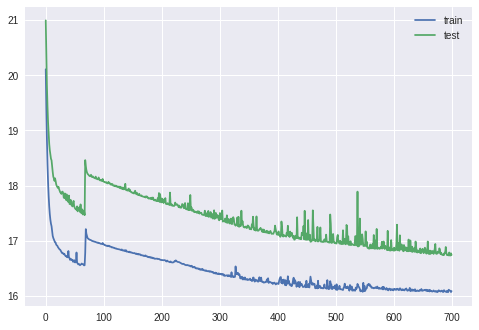

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers import Convolution1D, GlobalAveragePooling1D, MaxPooling1D, BatchNormalization,LeakyReLU,Flatten,Activation
from keras.optimizers import Nadam,SGD
model = Sequential()
"""model.add(Dense(20,input_dim=4, activation="relu", init='normal'))
model.add(Dense(20, activation="relu", init='normal'))
model.add(Dense(5, init='normal', activation='softmax'))
 
model.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['accuracy'])"""
model.add(LSTM(50,
               input_shape=(train_X.shape[1], train_X.shape[2])))  # returns a sequence of vectors of dimension 32
#model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LeakyReLU())
model.add(Dense(1))  # return a single vector of dimension 32
model.compile(loss='mae',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=700, validation_data=(test_X, test_y), verbose=1)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [26]:
!wget https://repo.continuum.io/archive/Anaconda3-5.0.1-Linux-x86_64.sh

--2018-02-02 03:14:16--  https://repo.continuum.io/archive/Anaconda3-5.0.1-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.16.18.10, 104.16.19.10, 2400:cb00:2048:1::6810:130a, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.16.18.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 550796553 (525M) [application/x-sh]
Saving to: ‘Anaconda3-5.0.1-Linux-x86_64.sh’

                Ana   2%[                    ]  13.58M   119KB/s    eta 27m 55s

Anaconda3-5.0.1-Lin   2%[                    ]  14.90M  39.8KB/s    eta 44m 43s^C


In [1]:
!ls

datalab
